# TLT Object detection example usecase

#### This notebook shows an example usecase of Object Detection using Transfer Learning Toolkit. **_It is not optimized for accuracy._**

0. [Set up env variables](#head-0)
1. [Prepare dataset and pre-trained model](#head-1)<br>
    1.1 [Convert to kitti format](#head-1-1)<br>
    1.2 [Prepare tf records from kitti format dataset](#head-1-2)<br>
    1.3 [Download pre-trained model](#head-1-3)<br>
2. [Provide training specfication](#head-2)
3. [Run TLT training](#head-3)
4. [Evaluate trained models](#head-4)
5. [Prune trained models](#head-5)
6. [Retrain pruned models](#head-6)
7. [Evaluate retrained model](#head-7)
8. [Test models](#head-8)
9. [Visualize inferences](#head-9)
10. [Deploy](#head-10)

## 0. Set up env variables <a class="anchor" id="head-0"></a>

Please replace the **$API_KEY** with your api key on **ngc.nvidia.com**

In [21]:
# Setting up env variables for cleaner command line commands.
print("Please replace the variable with your api key.")
%env API_KEY=ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1
%env USER_EXPERIMENT_DIR=/workspace/tlt-experiments
%env DATA_DOWNLOAD_DIR=/workspace/tlt-experiments/data
%env SPECS_DIR=/workspace/examples/specs

Please replace the variable with your api key.
env: API_KEY=ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1
env: USER_EXPERIMENT_DIR=/workspace/tlt-experiments
env: DATA_DOWNLOAD_DIR=/workspace/tlt-experiments/data
env: SPECS_DIR=/workspace/examples/specs


In [3]:
# Trying to change the location did not work. Hardcoded at many places
#%env DATA_DOWNLOAD_DIR=/data/dataset

env: DATA_DOWNLOAD_DIR=/data/dataset


## 1. Prepare dataset and pre-trained model <a class="anchor" id="head-1"></a>

We will be using the pascal VOC dataset for the tutorial. To find more details please visit 
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#devkit. Please download the dataset present at http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar to $DATA_DOWNLOAD_DIR.

In [4]:
# Check that file is present
import os
DATA_DIR = os.environ.get('DATA_DOWNLOAD_DIR')
if not os.path.isfile(os.path.join(DATA_DIR , 'VOCtrainval_11-May-2012.tar')):
    print('tar file for dataset not found. Please download.')
else:
    print('Found dataset.')

Found dataset.


In [5]:
# unpack 
!tar -xvf $DATA_DOWNLOAD_DIR/VOCtrainval_11-May-2012.tar -C $DATA_DOWNLOAD_DIR 

VOCdevkit/
VOCdevkit/VOC2012/
VOCdevkit/VOC2012/Annotations/
VOCdevkit/VOC2012/Annotations/2007_000027.xml
VOCdevkit/VOC2012/Annotations/2007_000032.xml
VOCdevkit/VOC2012/Annotations/2007_000033.xml
VOCdevkit/VOC2012/Annotations/2007_000039.xml
VOCdevkit/VOC2012/Annotations/2007_000042.xml
VOCdevkit/VOC2012/Annotations/2007_000061.xml
VOCdevkit/VOC2012/Annotations/2007_000063.xml
VOCdevkit/VOC2012/Annotations/2007_000068.xml
VOCdevkit/VOC2012/Annotations/2007_000121.xml
VOCdevkit/VOC2012/Annotations/2007_000123.xml
VOCdevkit/VOC2012/Annotations/2007_000129.xml
VOCdevkit/VOC2012/Annotations/2007_000170.xml
VOCdevkit/VOC2012/Annotations/2007_000175.xml
VOCdevkit/VOC2012/Annotations/2007_000187.xml
VOCdevkit/VOC2012/Annotations/2007_000241.xml
VOCdevkit/VOC2012/Annotations/2007_000243.xml
VOCdevkit/VOC2012/Annotations/2007_000250.xml
VOCdevkit/VOC2012/Annotations/2007_000256.xml
VOCdevkit/VOC2012/Annotations/2007_000272.xml
VOCdevkit/VOC2012/Annotations/2007_000323.xml
VOCdevkit/VOC2012/A

VOCdevkit/VOC2012/Annotations/2008_001073.xml
VOCdevkit/VOC2012/Annotations/2008_001074.xml
VOCdevkit/VOC2012/Annotations/2008_001075.xml
VOCdevkit/VOC2012/Annotations/2008_001076.xml
VOCdevkit/VOC2012/Annotations/2008_001077.xml
VOCdevkit/VOC2012/Annotations/2008_001078.xml
VOCdevkit/VOC2012/Annotations/2008_001080.xml
VOCdevkit/VOC2012/Annotations/2008_001081.xml
VOCdevkit/VOC2012/Annotations/2008_001083.xml
VOCdevkit/VOC2012/Annotations/2008_001089.xml
VOCdevkit/VOC2012/Annotations/2008_001090.xml
VOCdevkit/VOC2012/Annotations/2008_001092.xml
VOCdevkit/VOC2012/Annotations/2008_001098.xml
VOCdevkit/VOC2012/Annotations/2008_001099.xml
VOCdevkit/VOC2012/Annotations/2008_001104.xml
VOCdevkit/VOC2012/Annotations/2008_001105.xml
VOCdevkit/VOC2012/Annotations/2008_001106.xml
VOCdevkit/VOC2012/Annotations/2008_001111.xml
VOCdevkit/VOC2012/Annotations/2008_001112.xml
VOCdevkit/VOC2012/Annotations/2008_001113.xml
VOCdevkit/VOC2012/Annotations/2008_001114.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_003966.xml
VOCdevkit/VOC2012/Annotations/2008_003967.xml
VOCdevkit/VOC2012/Annotations/2008_003969.xml
VOCdevkit/VOC2012/Annotations/2008_003970.xml
VOCdevkit/VOC2012/Annotations/2008_003971.xml
VOCdevkit/VOC2012/Annotations/2008_003974.xml
VOCdevkit/VOC2012/Annotations/2008_003975.xml
VOCdevkit/VOC2012/Annotations/2008_003976.xml
VOCdevkit/VOC2012/Annotations/2008_003978.xml
VOCdevkit/VOC2012/Annotations/2008_003983.xml
VOCdevkit/VOC2012/Annotations/2008_003984.xml
VOCdevkit/VOC2012/Annotations/2008_003985.xml
VOCdevkit/VOC2012/Annotations/2008_003986.xml
VOCdevkit/VOC2012/Annotations/2008_003988.xml
VOCdevkit/VOC2012/Annotations/2008_003989.xml
VOCdevkit/VOC2012/Annotations/2008_003992.xml
VOCdevkit/VOC2012/Annotations/2008_003995.xml
VOCdevkit/VOC2012/Annotations/2008_003996.xml
VOCdevkit/VOC2012/Annotations/2008_003997.xml
VOCdevkit/VOC2012/Annotations/2008_003998.xml
VOCdevkit/VOC2012/Annotations/2008_004000.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_006548.xml
VOCdevkit/VOC2012/Annotations/2008_006549.xml
VOCdevkit/VOC2012/Annotations/2008_006553.xml
VOCdevkit/VOC2012/Annotations/2008_006554.xml
VOCdevkit/VOC2012/Annotations/2008_006558.xml
VOCdevkit/VOC2012/Annotations/2008_006561.xml
VOCdevkit/VOC2012/Annotations/2008_006562.xml
VOCdevkit/VOC2012/Annotations/2008_006564.xml
VOCdevkit/VOC2012/Annotations/2008_006566.xml
VOCdevkit/VOC2012/Annotations/2008_006567.xml
VOCdevkit/VOC2012/Annotations/2008_006568.xml
VOCdevkit/VOC2012/Annotations/2008_006570.xml
VOCdevkit/VOC2012/Annotations/2008_006576.xml
VOCdevkit/VOC2012/Annotations/2008_006578.xml
VOCdevkit/VOC2012/Annotations/2008_006579.xml
VOCdevkit/VOC2012/Annotations/2008_006585.xml
VOCdevkit/VOC2012/Annotations/2008_006586.xml
VOCdevkit/VOC2012/Annotations/2008_006587.xml
VOCdevkit/VOC2012/Annotations/2008_006588.xml
VOCdevkit/VOC2012/Annotations/2008_006591.xml
VOCdevkit/VOC2012/Annotations/2008_006598.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2009_000486.xml
VOCdevkit/VOC2012/Annotations/2009_000487.xml
VOCdevkit/VOC2012/Annotations/2009_000488.xml
VOCdevkit/VOC2012/Annotations/2009_000491.xml
VOCdevkit/VOC2012/Annotations/2009_000493.xml
VOCdevkit/VOC2012/Annotations/2009_000494.xml
VOCdevkit/VOC2012/Annotations/2009_000496.xml
VOCdevkit/VOC2012/Annotations/2009_000499.xml
VOCdevkit/VOC2012/Annotations/2009_000500.xml
VOCdevkit/VOC2012/Annotations/2009_000501.xml
VOCdevkit/VOC2012/Annotations/2009_000502.xml
VOCdevkit/VOC2012/Annotations/2009_000503.xml
VOCdevkit/VOC2012/Annotations/2009_000504.xml
VOCdevkit/VOC2012/Annotations/2009_000505.xml
VOCdevkit/VOC2012/Annotations/2009_000511.xml
VOCdevkit/VOC2012/Annotations/2009_000512.xml
VOCdevkit/VOC2012/Annotations/2009_000513.xml
VOCdevkit/VOC2012/Annotations/2009_000515.xml
VOCdevkit/VOC2012/Annotations/2009_000516.xml
VOCdevkit/VOC2012/Annotations/2009_000519.xml
VOCdevkit/VOC2012/Annotations/2009_000522.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_003151.xml
VOCdevkit/VOC2012/Annotations/2009_003153.xml
VOCdevkit/VOC2012/Annotations/2009_003154.xml
VOCdevkit/VOC2012/Annotations/2009_003155.xml
VOCdevkit/VOC2012/Annotations/2009_003156.xml
VOCdevkit/VOC2012/Annotations/2009_003157.xml
VOCdevkit/VOC2012/Annotations/2009_003164.xml
VOCdevkit/VOC2012/Annotations/2009_003165.xml
VOCdevkit/VOC2012/Annotations/2009_003166.xml
VOCdevkit/VOC2012/Annotations/2009_003168.xml
VOCdevkit/VOC2012/Annotations/2009_003172.xml
VOCdevkit/VOC2012/Annotations/2009_003173.xml
VOCdevkit/VOC2012/Annotations/2009_003175.xml
VOCdevkit/VOC2012/Annotations/2009_003181.xml
VOCdevkit/VOC2012/Annotations/2009_003183.xml
VOCdevkit/VOC2012/Annotations/2009_003185.xml
VOCdevkit/VOC2012/Annotations/2009_003187.xml
VOCdevkit/VOC2012/Annotations/2009_003189.xml
VOCdevkit/VOC2012/Annotations/2009_003191.xml
VOCdevkit/VOC2012/Annotations/2009_003193.xml
VOCdevkit/VOC2012/Annotations/2009_003194.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2010_000810.xml
VOCdevkit/VOC2012/Annotations/2010_000811.xml
VOCdevkit/VOC2012/Annotations/2010_000814.xml
VOCdevkit/VOC2012/Annotations/2010_000815.xml
VOCdevkit/VOC2012/Annotations/2010_000821.xml
VOCdevkit/VOC2012/Annotations/2010_000822.xml
VOCdevkit/VOC2012/Annotations/2010_000827.xml
VOCdevkit/VOC2012/Annotations/2010_000828.xml
VOCdevkit/VOC2012/Annotations/2010_000829.xml
VOCdevkit/VOC2012/Annotations/2010_000830.xml
VOCdevkit/VOC2012/Annotations/2010_000831.xml
VOCdevkit/VOC2012/Annotations/2010_000836.xml
VOCdevkit/VOC2012/Annotations/2010_000837.xml
VOCdevkit/VOC2012/Annotations/2010_000838.xml
VOCdevkit/VOC2012/Annotations/2010_000842.xml
VOCdevkit/VOC2012/Annotations/2010_000846.xml
VOCdevkit/VOC2012/Annotations/2010_000847.xml
VOCdevkit/VOC2012/Annotations/2010_000849.xml
VOCdevkit/VOC2012/Annotations/2010_000855.xml
VOCdevkit/VOC2012/Annotations/2010_000857.xml
VOCdevkit/VOC2012/Annotations/2010_000860.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_003897.xml
VOCdevkit/VOC2012/Annotations/2010_003898.xml
VOCdevkit/VOC2012/Annotations/2010_003899.xml
VOCdevkit/VOC2012/Annotations/2010_003900.xml
VOCdevkit/VOC2012/Annotations/2010_003906.xml
VOCdevkit/VOC2012/Annotations/2010_003910.xml
VOCdevkit/VOC2012/Annotations/2010_003911.xml
VOCdevkit/VOC2012/Annotations/2010_003912.xml
VOCdevkit/VOC2012/Annotations/2010_003914.xml
VOCdevkit/VOC2012/Annotations/2010_003915.xml
VOCdevkit/VOC2012/Annotations/2010_003919.xml
VOCdevkit/VOC2012/Annotations/2010_003920.xml
VOCdevkit/VOC2012/Annotations/2010_003925.xml
VOCdevkit/VOC2012/Annotations/2010_003928.xml
VOCdevkit/VOC2012/Annotations/2010_003929.xml
VOCdevkit/VOC2012/Annotations/2010_003931.xml
VOCdevkit/VOC2012/Annotations/2010_003933.xml
VOCdevkit/VOC2012/Annotations/2010_003936.xml
VOCdevkit/VOC2012/Annotations/2010_003937.xml
VOCdevkit/VOC2012/Annotations/2010_003938.xml
VOCdevkit/VOC2012/Annotations/2010_003939.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_006917.xml
VOCdevkit/VOC2012/Annotations/2010_006919.xml
VOCdevkit/VOC2012/Annotations/2010_006921.xml
VOCdevkit/VOC2012/Annotations/2010_006922.xml
VOCdevkit/VOC2012/Annotations/2010_006923.xml
VOCdevkit/VOC2012/Annotations/2010_006924.xml
VOCdevkit/VOC2012/Annotations/2010_006925.xml
VOCdevkit/VOC2012/Annotations/2010_006926.xml
VOCdevkit/VOC2012/Annotations/2010_006927.xml
VOCdevkit/VOC2012/Annotations/2010_006929.xml
VOCdevkit/VOC2012/Annotations/2010_006932.xml
VOCdevkit/VOC2012/Annotations/2010_006933.xml
VOCdevkit/VOC2012/Annotations/2010_006934.xml
VOCdevkit/VOC2012/Annotations/2010_006936.xml
VOCdevkit/VOC2012/Annotations/2010_006943.xml
VOCdevkit/VOC2012/Annotations/2010_006944.xml
VOCdevkit/VOC2012/Annotations/2010_006949.xml
VOCdevkit/VOC2012/Annotations/2010_006952.xml
VOCdevkit/VOC2012/Annotations/2010_006953.xml
VOCdevkit/VOC2012/Annotations/2010_006954.xml
VOCdevkit/VOC2012/Annotations/2010_006955.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2011_002887.xml
VOCdevkit/VOC2012/Annotations/2011_002889.xml
VOCdevkit/VOC2012/Annotations/2011_002890.xml
VOCdevkit/VOC2012/Annotations/2011_002897.xml
VOCdevkit/VOC2012/Annotations/2011_002900.xml
VOCdevkit/VOC2012/Annotations/2011_002904.xml
VOCdevkit/VOC2012/Annotations/2011_002908.xml
VOCdevkit/VOC2012/Annotations/2011_002911.xml
VOCdevkit/VOC2012/Annotations/2011_002912.xml
VOCdevkit/VOC2012/Annotations/2011_002913.xml
VOCdevkit/VOC2012/Annotations/2011_002915.xml
VOCdevkit/VOC2012/Annotations/2011_002916.xml
VOCdevkit/VOC2012/Annotations/2011_002917.xml
VOCdevkit/VOC2012/Annotations/2011_002920.xml
VOCdevkit/VOC2012/Annotations/2011_002921.xml
VOCdevkit/VOC2012/Annotations/2011_002924.xml
VOCdevkit/VOC2012/Annotations/2011_002925.xml
VOCdevkit/VOC2012/Annotations/2011_002927.xml
VOCdevkit/VOC2012/Annotations/2011_002929.xml
VOCdevkit/VOC2012/Annotations/2011_002930.xml
VOCdevkit/VOC2012/Annotations/2011_002931.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_005943.xml
VOCdevkit/VOC2012/Annotations/2011_005946.xml
VOCdevkit/VOC2012/Annotations/2011_005947.xml
VOCdevkit/VOC2012/Annotations/2011_005948.xml
VOCdevkit/VOC2012/Annotations/2011_005949.xml
VOCdevkit/VOC2012/Annotations/2011_005950.xml
VOCdevkit/VOC2012/Annotations/2011_005951.xml
VOCdevkit/VOC2012/Annotations/2011_005952.xml
VOCdevkit/VOC2012/Annotations/2011_005953.xml
VOCdevkit/VOC2012/Annotations/2011_005954.xml
VOCdevkit/VOC2012/Annotations/2011_005959.xml
VOCdevkit/VOC2012/Annotations/2011_005963.xml
VOCdevkit/VOC2012/Annotations/2011_005966.xml
VOCdevkit/VOC2012/Annotations/2011_005967.xml
VOCdevkit/VOC2012/Annotations/2011_005968.xml
VOCdevkit/VOC2012/Annotations/2011_005970.xml
VOCdevkit/VOC2012/Annotations/2011_005971.xml
VOCdevkit/VOC2012/Annotations/2011_005972.xml
VOCdevkit/VOC2012/Annotations/2011_005975.xml
VOCdevkit/VOC2012/Annotations/2011_005976.xml
VOCdevkit/VOC2012/Annotations/2011_005977.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2012_001944.xml
VOCdevkit/VOC2012/Annotations/2012_001945.xml
VOCdevkit/VOC2012/Annotations/2012_001949.xml
VOCdevkit/VOC2012/Annotations/2012_001950.xml
VOCdevkit/VOC2012/Annotations/2012_001954.xml
VOCdevkit/VOC2012/Annotations/2012_001955.xml
VOCdevkit/VOC2012/Annotations/2012_001956.xml
VOCdevkit/VOC2012/Annotations/2012_001957.xml
VOCdevkit/VOC2012/Annotations/2012_001959.xml
VOCdevkit/VOC2012/Annotations/2012_001960.xml
VOCdevkit/VOC2012/Annotations/2012_001961.xml
VOCdevkit/VOC2012/Annotations/2012_001963.xml
VOCdevkit/VOC2012/Annotations/2012_001966.xml
VOCdevkit/VOC2012/Annotations/2012_001967.xml
VOCdevkit/VOC2012/Annotations/2012_001969.xml
VOCdevkit/VOC2012/Annotations/2012_001974.xml
VOCdevkit/VOC2012/Annotations/2012_001976.xml
VOCdevkit/VOC2012/Annotations/2012_001981.xml
VOCdevkit/VOC2012/Annotations/2012_001983.xml
VOCdevkit/VOC2012/Annotations/2012_001985.xml
VOCdevkit/VOC2012/Annotations/2012_001986.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/ImageSets/Main/tvmonitor_val.txt
VOCdevkit/VOC2012/ImageSets/Main/val.txt
VOCdevkit/VOC2012/ImageSets/Segmentation/
VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt
VOCdevkit/VOC2012/ImageSets/Segmentation/trainval.txt
VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt
VOCdevkit/VOC2012/JPEGImages/
VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000033.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000039.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000042.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000061.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000063.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000068.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000121.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000123.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000129.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000170.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000175.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000187.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000241.jpg
VOCdevk

VOCdevkit/VOC2012/JPEGImages/2007_006151.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006163.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006171.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006212.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006232.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006240.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006241.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006254.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006260.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006277.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006281.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006282.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006303.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006317.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006348.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006364.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006373.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006400.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006409.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006442.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006444.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006445.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_000181.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000182.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000183.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000185.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000187.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000188.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000189.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000190.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000191.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000192.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000193.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000194.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000195.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000196.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000197.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000199.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000202.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000203.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000204.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000207.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000213.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000215.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_000899.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000901.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000902.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000904.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000905.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000908.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000910.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000911.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000912.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000914.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000915.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000916.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000917.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000919.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000922.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000923.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000924.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000928.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000931.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000934.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000936.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000939.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_001632.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001636.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001638.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001640.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001641.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001643.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001645.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001648.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001649.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001652.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001653.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001655.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001659.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001660.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001661.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001663.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001666.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001667.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001668.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001669.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001670.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001673.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_002330.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002331.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002335.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002338.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002340.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002343.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002344.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002347.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002349.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002350.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002356.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002357.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002358.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002359.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002361.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002362.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002365.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002366.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002368.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002369.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002370.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002372.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_003052.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003053.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003055.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003056.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003057.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003059.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003060.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003061.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003062.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003063.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003065.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003067.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003068.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003072.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003073.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003075.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003076.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003079.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003081.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003082.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003083.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003087.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_003762.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003763.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003764.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003766.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003767.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003768.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003769.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003772.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003773.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003774.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003775.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003776.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003777.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003779.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003780.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003781.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003782.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003788.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003789.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003791.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003793.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003794.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_004470.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004471.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004476.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004477.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004478.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004479.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004480.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004482.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004487.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004488.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004490.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004492.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004493.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004497.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004498.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004499.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004501.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004502.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004504.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004505.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004506.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004510.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_005158.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005159.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005160.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005166.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005167.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005168.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005171.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005172.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005174.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005175.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005178.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005181.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005182.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005183.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005185.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005186.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005190.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005191.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005193.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005194.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005196.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005197.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_005853.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005855.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005856.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005857.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005860.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005863.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005865.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005867.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005869.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005871.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005873.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005874.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005875.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005877.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005878.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005881.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005882.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005883.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005884.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005889.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005890.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005891.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_006562.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006564.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006566.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006567.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006568.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006570.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006576.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006578.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006579.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006585.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006586.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006587.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006588.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006591.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006598.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006599.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006600.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006602.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006604.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006605.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006606.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006609.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_007269.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007273.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007274.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007277.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007279.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007280.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007281.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007282.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007285.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007286.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007287.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007289.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007291.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007293.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007295.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007298.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007305.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007307.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007311.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007312.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007313.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007314.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_007962.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007964.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007966.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007969.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007970.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007973.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007975.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007977.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007981.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007985.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007986.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007987.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007988.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007989.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007990.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007993.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007994.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007997.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007998.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007999.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008001.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008002.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_008659.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008662.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008665.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008666.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008668.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008671.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008673.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008674.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008675.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008676.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008679.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008681.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008682.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008683.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008684.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008685.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008689.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008690.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008691.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008694.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008695.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008696.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_000513.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000515.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000516.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000519.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000522.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000523.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000525.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000526.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000527.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000529.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000532.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000535.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000536.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000539.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000542.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000544.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000545.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000546.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000547.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000549.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000550.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000552.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_001110.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001111.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001113.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001117.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001118.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001120.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001121.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001124.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001126.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001128.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001129.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001133.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001134.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001135.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001137.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001138.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001139.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001140.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001145.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001146.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001147.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001148.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_001735.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001738.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001740.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001741.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001743.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001744.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001746.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001747.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001749.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001750.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001751.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001752.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001754.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001755.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001758.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001759.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001764.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001765.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001767.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001768.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001770.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001774.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_002343.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002346.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002348.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002349.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002350.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002352.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002358.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002360.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002362.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002363.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002366.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002370.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002371.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002372.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002373.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002374.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002376.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002377.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002380.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002381.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002382.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002386.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_002985.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002986.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002988.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002990.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002993.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002995.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002998.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002999.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003000.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003002.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003003.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003005.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003006.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003007.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003010.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003012.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003013.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003018.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003019.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003020.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003022.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003023.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_003594.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003598.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003600.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003601.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003605.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003606.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003607.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003608.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003609.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003612.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003613.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003614.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003618.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003624.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003626.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003627.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003629.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003633.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003634.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003635.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003636.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003637.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_004205.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004207.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004210.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004211.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004212.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004213.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004217.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004218.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004221.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004222.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004224.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004225.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004227.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004228.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004229.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004231.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004232.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004233.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004234.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004241.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004242.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004243.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_004855.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004856.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004857.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004858.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004859.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004865.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004867.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004868.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004869.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004871.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004872.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004874.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004876.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004877.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004880.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004882.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004885.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004886.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004887.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004888.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004889.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004890.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_000224.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000227.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000229.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000233.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000234.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000238.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000241.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000244.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000245.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000246.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000247.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000248.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000249.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000250.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000254.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000255.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000256.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000260.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000261.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000262.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000263.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000264.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_000945.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000947.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000948.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000952.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000954.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000955.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000956.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000959.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000961.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000968.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000970.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000971.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000973.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000974.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000975.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000978.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000979.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000981.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000983.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000984.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000986.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000989.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_001676.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001679.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001680.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001682.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001685.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001687.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001689.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001690.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001691.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001692.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001694.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001697.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001698.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001699.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001700.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001705.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001706.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001709.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001710.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001712.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001715.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001717.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_002402.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002405.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002406.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002408.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002409.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002410.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002413.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002418.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002420.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002422.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002424.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002425.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002427.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002429.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002431.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002435.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002436.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002438.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002439.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002440.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002445.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002446.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_003122.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003123.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003127.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003129.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003132.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003133.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003135.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003137.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003138.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003139.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003143.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003146.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003147.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003148.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003149.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003151.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003153.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003154.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003156.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003157.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003159.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003160.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_003852.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003854.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003855.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003856.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003857.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003859.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003860.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003861.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003863.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003864.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003865.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003871.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003874.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003875.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003877.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003878.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003879.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003884.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003887.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003890.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003891.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003892.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_004573.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004575.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004576.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004577.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004581.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004584.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004585.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004586.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004588.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004591.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004592.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004594.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004596.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004597.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004598.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004600.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004601.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004604.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004608.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004609.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004616.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004618.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_005279.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005284.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005285.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005287.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005292.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005293.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005297.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005299.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005301.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005303.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005305.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005306.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005308.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005309.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005310.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005312.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005314.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005317.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005318.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005320.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005323.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005327.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_005985.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005986.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005987.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005991.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005992.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005993.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005995.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005996.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005997.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005998.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006000.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006003.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006004.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006009.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006010.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006011.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006012.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006015.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006021.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006023.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006025.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006026.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_006723.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006727.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006730.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006731.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006734.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006735.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006736.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006737.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006738.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006739.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006743.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006744.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006749.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006750.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006751.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006753.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006754.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006756.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006757.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006758.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006759.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006760.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_000428.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000430.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000432.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000433.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000434.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000435.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000436.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000438.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000442.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000444.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000445.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000449.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000450.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000453.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000454.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000455.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000456.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000457.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000458.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000461.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000465.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000467.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_001100.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001105.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001106.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001107.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001108.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001110.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001111.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001114.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001116.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001117.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001122.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001123.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001124.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001126.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001127.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001128.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001133.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001134.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001135.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001136.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001137.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001138.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_001811.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001812.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001815.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001819.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001820.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001821.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001822.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001824.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001825.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001826.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001827.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001833.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001834.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001837.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001839.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001840.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001841.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001842.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001845.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001847.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001854.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001855.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_002504.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002505.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002506.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002507.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002509.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002511.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002514.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002515.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002516.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002517.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002519.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002520.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002526.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002528.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002531.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002532.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002533.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002535.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002536.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002542.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002543.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002548.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_003207.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003211.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003212.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003213.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003216.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003220.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003223.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003228.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003229.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003230.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003232.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003236.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003237.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003238.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003240.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003242.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003244.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003246.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003247.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003250.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003253.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003254.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_003972.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003973.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003974.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003977.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003978.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003979.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003980.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003981.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003984.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003988.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003990.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003991.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003995.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003997.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003998.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003999.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004007.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004008.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004009.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004011.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004013.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004014.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_004686.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004687.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004688.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004689.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004693.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004694.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004697.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004702.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004705.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004708.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004709.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004711.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004717.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004718.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004720.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004724.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004725.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004726.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004727.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004728.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004730.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004731.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_005466.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005467.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005471.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005472.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005473.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005474.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005478.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005479.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005480.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005484.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005491.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005492.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005493.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005494.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005498.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005500.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005501.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005502.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005504.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005505.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005507.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005509.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_006181.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006183.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006184.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006187.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006188.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006190.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006192.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006193.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006196.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006197.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006199.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006200.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006203.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006204.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006205.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006211.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006213.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006217.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006218.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006219.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006221.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006226.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_006912.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006913.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006914.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006916.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006917.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006921.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006922.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006923.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006925.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006927.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006928.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006930.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006933.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006934.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006935.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006936.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006939.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006940.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006942.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006944.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006945.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006950.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_000515.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000516.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000517.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000518.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000521.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000523.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000524.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000529.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000532.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000534.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000536.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000538.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000539.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000544.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000545.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000548.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000550.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000552.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000553.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000554.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000555.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000556.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_001252.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001254.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001255.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001258.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001261.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001262.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001264.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001265.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001266.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001267.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001271.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001272.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001273.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001276.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001279.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001281.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001282.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001283.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001286.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001287.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001290.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001291.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_002023.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002025.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002026.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002036.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002037.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002041.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002045.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002046.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002049.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002050.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002051.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002056.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002059.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002060.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002062.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002063.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002064.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002066.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002068.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002072.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002073.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002075.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_002778.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002780.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002782.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002783.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002789.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002790.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002793.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002797.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002798.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002799.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002801.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002807.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002808.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002809.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002812.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002814.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002816.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002817.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002818.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002828.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002829.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002830.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_003605.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003607.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003608.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003609.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003611.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003614.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003616.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003618.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003621.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003623.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003624.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003627.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003628.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003630.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003631.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003632.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003633.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003636.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003638.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003639.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003643.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003644.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_004330.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004331.jpg
VOCdevkit/VOC2012/SegmentationClass/
VOCdevkit/VOC2012/SegmentationClass/2007_000032.png
VOCdevkit/VOC2012/SegmentationClass/2007_000033.png
VOCdevkit/VOC2012/SegmentationClass/2007_000039.png
VOCdevkit/VOC2012/SegmentationClass/2007_000042.png
VOCdevkit/VOC2012/SegmentationClass/2007_000061.png
VOCdevkit/VOC2012/SegmentationClass/2007_000063.png
VOCdevkit/VOC2012/SegmentationClass/2007_000068.png
VOCdevkit/VOC2012/SegmentationClass/2007_000121.png
VOCdevkit/VOC2012/SegmentationClass/2007_000123.png
VOCdevkit/VOC2012/SegmentationClass/2007_000129.png
VOCdevkit/VOC2012/SegmentationClass/2007_000170.png
VOCdevkit/VOC2012/SegmentationClass/2007_000175.png
VOCdevkit/VOC2012/SegmentationClass/2007_000187.png
VOCdevkit/VOC2012/SegmentationClass/2007_000241.png
VOCdevkit/VOC2012/SegmentationClass/2007_000243.png
VOCdevkit/VOC2012/SegmentationClass/2007_000250.png
VOCdevkit/VOC2012/SegmentationClass/2007_

VOCdevkit/VOC2012/SegmentationClass/2009_000989.png
VOCdevkit/VOC2012/SegmentationClass/2009_000991.png
VOCdevkit/VOC2012/SegmentationClass/2009_000996.png
VOCdevkit/VOC2012/SegmentationClass/2009_000998.png
VOCdevkit/VOC2012/SegmentationClass/2009_001002.png
VOCdevkit/VOC2012/SegmentationClass/2009_001008.png
VOCdevkit/VOC2012/SegmentationClass/2009_001019.png
VOCdevkit/VOC2012/SegmentationClass/2009_001027.png
VOCdevkit/VOC2012/SegmentationClass/2009_001036.png
VOCdevkit/VOC2012/SegmentationClass/2009_001070.png
VOCdevkit/VOC2012/SegmentationClass/2009_001082.png
VOCdevkit/VOC2012/SegmentationClass/2009_001085.png
VOCdevkit/VOC2012/SegmentationClass/2009_001095.png
VOCdevkit/VOC2012/SegmentationClass/2009_001096.png
VOCdevkit/VOC2012/SegmentationClass/2009_001100.png
VOCdevkit/VOC2012/SegmentationClass/2009_001104.png
VOCdevkit/VOC2012/SegmentationClass/2009_001108.png
VOCdevkit/VOC2012/SegmentationClass/2009_001117.png
VOCdevkit/VOC2012/SegmentationClass/2009_001124.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2011_002993.png
VOCdevkit/VOC2012/SegmentationClass/2011_002997.png
VOCdevkit/VOC2012/SegmentationClass/2011_003003.png
VOCdevkit/VOC2012/SegmentationClass/2011_003011.png
VOCdevkit/VOC2012/SegmentationClass/2011_003019.png
VOCdevkit/VOC2012/SegmentationClass/2011_003025.png
VOCdevkit/VOC2012/SegmentationClass/2011_003030.png
VOCdevkit/VOC2012/SegmentationClass/2011_003038.png
VOCdevkit/VOC2012/SegmentationClass/2011_003055.png
VOCdevkit/VOC2012/SegmentationClass/2011_003057.png
VOCdevkit/VOC2012/SegmentationClass/2011_003066.png
VOCdevkit/VOC2012/SegmentationClass/2011_003078.png
VOCdevkit/VOC2012/SegmentationClass/2011_003085.png
VOCdevkit/VOC2012/SegmentationClass/2011_003103.png
VOCdevkit/VOC2012/SegmentationClass/2011_003114.png
VOCdevkit/VOC2012/SegmentationClass/2011_003121.png
VOCdevkit/VOC2012/SegmentationClass/2011_003141.png
VOCdevkit/VOC2012/SegmentationClass/2011_003145.png
VOCdevkit/VOC2012/SegmentationClass/2011_003146.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationObject/2009_001283.png
VOCdevkit/VOC2012/SegmentationObject/2009_001299.png
VOCdevkit/VOC2012/SegmentationObject/2009_001300.png
VOCdevkit/VOC2012/SegmentationObject/2009_001306.png
VOCdevkit/VOC2012/SegmentationObject/2009_001311.png
VOCdevkit/VOC2012/SegmentationObject/2009_001314.png
VOCdevkit/VOC2012/SegmentationObject/2009_001332.png
VOCdevkit/VOC2012/SegmentationObject/2009_001333.png
VOCdevkit/VOC2012/SegmentationObject/2009_001339.png
VOCdevkit/VOC2012/SegmentationObject/2009_001359.png
VOCdevkit/VOC2012/SegmentationObject/2009_001363.png
VOCdevkit/VOC2012/SegmentationObject/2009_001385.png
VOCdevkit/VOC2012/SegmentationObject/2009_001388.png
VOCdevkit/VOC2012/SegmentationObject/2009_001390.png
VOCdevkit/VOC2012/SegmentationObject/2009_001391.png
VOCdevkit/VOC2012/SegmentationObject/2009_001403.png
VOCdevkit/VOC2012/SegmentationObject/2009_001411.png
VOCdevkit/VOC2012/SegmentationObject/2009_001422.png
VOCdevkit/VOC2012/SegmentationObject/2009_0014

In [6]:
# verify
!ls $DATA_DOWNLOAD_DIR/VOCdevkit/VOC2012

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


### 1.1 Convert to kitti format <a class="anchor" id="head-1-1"></a>

In [22]:
from voc_utils import convert_to_kitti
import os

image_width = 496
image_height = 320

DATA_DIR = os.environ['DATA_DOWNLOAD_DIR']
voc_root = os.path.join(DATA_DIR,'VOCdevkit', 'VOC2012')
convert_to_kitti(os.path.join(DATA_DIR,'VOCdevkit', 'VOC2012'), image_height, image_width)

In [23]:
print(len(os.listdir(os.path.join(voc_root, 'Annotations_kitti/test'))))
print(len(os.listdir(os.path.join(voc_root, 'Annotations_kitti/trainval'))))

3643
13482


In [24]:
!cat $DATA_DOWNLOAD_DIR/VOCdevkit/VOC2012/Annotations_kitti/trainval/2010_001110.txt

car 0.00 0 0.00 31.744 0.853 483.104 284.160 0.00 0.00 0.00 0.00 0.00 0.00 0.00
car 0.00 0 0.00 272.800 0.853 495.008 160.427 0.00 0.00 0.00 0.00 0.00 0.00 0.00


### 1.2 Prepare tf records from kitti format dataset <a class="anchor" id="head-1-2"></a>

* Update the tfrecords spec file to take in your kitti format dataset
* Create the tfrecords using the tlt-dataset-convert 
    * Note: The output directory should be created before hand to update place the tfrecords
* TFRecords only need to be generated once.

In [25]:
print("TFrecords conversion spec file for kitti training")
!cat $SPECS_DIR/det_tfrecords_pascal_voc_trainval.txt

TFrecords conversion spec file for kitti training
kitti_config {
  root_directory_path: "/workspace/tlt-experiments/data/VOCdevkit/VOC2012"
  image_dir_name: "JPEGImages_kitti/trainval"
  label_dir_name: "Annotations_kitti/trainval"
  image_extension: ".jpg"
  partition_mode: "random"
  val_split: 20
  num_shards: 10
}
image_directory_path: "/workspace/tlt-experiments/data/VOCdevkit/VOC2012"


In [26]:
# Creating a new directory for the output tfrecords dump.
!mkdir -p $USER_EXPERIMENT_DIR/tfrecords/pascal_voc
!tlt-dataset-convert -d $SPECS_DIR/det_tfrecords_pascal_voc_trainval.txt \
                     -o $USER_EXPERIMENT_DIR/tfrecords/pascal_voc/pascal_voc

Using TensorFlow backend.
2019-04-08 13:34:20,885 - iva.dashnet.dataio.build_converter - INFO - Instantiating a kitti converter
2019-04-08 13:34:20,931 - iva.dashnet.dataio.kitti_converter_lib - INFO - Num images in
Train: 10786	Val: 2696
2019-04-08 13:34:20,931 - iva.dashnet.dataio.kitti_converter_lib - INFO - Validation data in partition 0. Hence, while choosing the validationset during training choose validation_fold 0.
2019-04-08 13:34:20,936 - dlav.drivenet.dataio.dataset_converter_lib - INFO - Writing partition 0, shard 0
/usr/local/lib/python2.7/dist-packages/iva/dashnet/dataio/kitti_converter_lib.py:255: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
2019-04-08 13:34:21,265 - dlav.drivenet.dataio.dataset_converter_lib - INFO - Writing partition 0, shard 1
2019-04-08 13:34:21,587 - dlav.drivenet.dataio.dataset_converter_lib - INFO - Writing partition 0, shard 2
2019-04-

In [27]:
!ls -rlt $USER_EXPERIMENT_DIR/tfrecords/pascal_voc/

total 9400
-rw-r--r-- 1 root root 192225 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00000-of-00010
-rw-r--r-- 1 root root 192559 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00001-of-00010
-rw-r--r-- 1 root root 192525 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00002-of-00010
-rw-r--r-- 1 root root 190132 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00003-of-00010
-rw-r--r-- 1 root root 189409 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00004-of-00010
-rw-r--r-- 1 root root 190681 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00005-of-00010
-rw-r--r-- 1 root root 191739 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00006-of-00010
-rw-r--r-- 1 root root 190423 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00007-of-00010
-rw-r--r-- 1 root root 192877 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00008-of-00010
-rw-r--r-- 1 root root 196132 Apr  8 13:34 pascal_voc-fold-000-of-002-shard-00009-of-00010
-rw-r--r-- 1 root root 770217 Apr  8 13:34 pascal_voc-fold-001-of-002-shard-000

### 1.3 Download pre-trained model <a class="anchor" id="head-1-3"></a>

Print the list of models. Find your **ORG** and **TEAM** on **ngc.nvidia.com** and replace the **-o** and **-t** arguments.  

In [28]:
!tlt-pull -k ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1 -lm -o nvtltea -t iva

+----------+----------+---------+----------+----------+----------+----------+
| Name     | Org/Team | Latest  | Applicat | Framewor | Precisio | Last     |
|          |          | Version | ion      | k        | n        | Modified |
+----------+----------+---------+----------+----------+----------+----------+
| tlt_iva_ | nvtltea/ | 1       | Classifi | TLT      | FP32     | 2019-03- |
| classifi | iva      |         | cation   |          |          | 01       |
| cation_a |          |         |          |          |          | 20:41:41 |
| lexnet   |          |         |          |          |          | UTC      |
| tlt_iva_ | nvtltea/ | 1       | Classifi | TLT      | FP32     | 2019-03- |
| classifi | iva      |         | cation   |          |          | 02       |
| cation_g |          |         |          |          |          | 00:08:48 |
| ooglenet |          |         |          |          |          | UTC      |
| tlt_iva_ | nvtltea/ | 1       | Classifi | TLT      | FP32    

In [29]:
!mkdir -p $USER_EXPERIMENT_DIR/pretrained_resnet18/

Download the resnet18 object detection model.

In [30]:
# Pull pretrained model from NGC
!tlt-pull -k ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1 -m tlt_iva_object_detection_resnet18 -v 1 -d $USER_EXPERIMENT_DIR/pretrained_resnet18/ -o nvtltea -t iva

Downloaded 42.16 MB in 4s, Download speed: 10.51 MB/s               
----------------------------------------------------
Transfer id: tlt_iva_object_detection_resnet18_v1 Download status: Completed.
Downloaded local path: /tmp/tmpDwl1ST/tlt_iva_object_detection_resnet18_v1
Total files downloaded: 2 
Total downloaded size: 42.16 MB
Started at: 2019-04-08 13:36:29.284327
Completed at: 2019-04-08 13:36:33.294006
Duration taken: 4s seconds
----------------------------------------------------
Finished downloading tlt_iva_object_detection_resnet18


In [31]:
!ls -rlt $USER_EXPERIMENT_DIR/pretrained_resnet18

total 45388
-rw-r--r-- 1 root root 46470680 Apr  8 13:36 resnet18_kitti_multiclass_v1.tlt
-rw-r--r-- 1 root root      250 Apr  8 13:36 license.txt


## 2. Provide training specfication <a class="anchor" id="head-2"></a>
* Tfrecords for the train datasets
    * Inorder to use the newly generated tfrecords, update the dataset_config parameter in the spec file at `$SPECS_DIR/train_resnet18_spec.txt` 
    * Update the fold number to use for evaluation. In case of random data split, please use fold 0 only
    * For sequence wise you may use any fold generated from the dataset convert tool
* Pre-trained models
* Augmentation parameters for on the fly data augmentation
* Other training (hyper-)parameters such as batch size, number of epochs, learning rate etc.

In [32]:
!cat $SPECS_DIR/det_train_resnet18_pascal_voc.txt

random_seed: 42
model_config {
  template: "resnet"
  num_layers: 18
  use_pooling: False
  use_batch_norm: True
  dropout_rate: 0.0
  training_precision: {
    backend_floatx: FLOAT32
  }
  objective_set: {
    cov {}
    bbox {
      scale: 35.0
      offset: 0.5
    }
  }
}
bbox_rasterizer_config {
  target_class_config {
    key: "car"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 0.4
      cov_radius_y: 0.4
      bbox_min_radius: 1.0
    }
  }
  target_class_config {
    key: "bicycle"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 1.0
      cov_radius_y: 1.0
      bbox_min_radius: 1.0
    }
  }
  target_class_config {
    key: "person"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 1.0
      cov_radius_y: 1.0
      bbox_min_radius: 1.0
    }
  }
  deadzone_radius: 0.67
}
cost_function_config {
  target_classes {
    name: "car"
    class_weight: 1.0
    coverage_foreground_weigh

## 3. Run TLT training <a class="anchor" id="head-3"></a>
* Provide the sample spec file and the output directory location for models

#### The training can take several hours to complete depending on your GPU.

In [33]:
!tlt-train detection -e $SPECS_DIR/det_train_resnet18_pascal_voc.txt \
                     -r $USER_EXPERIMENT_DIR/experiment_dir_unpruned \
                     -k ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1 \
                     -n resnet18_detector

Using TensorFlow backend.
--------------------------------------------------------------------------
[[37462,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: ad25ce66ead5

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
2019-04-08 13:39:47.165684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-08 13:39:47.166578: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:07.0
totalMemory: 15.90GiB

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is

INFO:tensorflow:loss = 0.06506028, epoch = 0.0029585798816568047, step = 1 (41.655 sec)
2019-04-08 13:45:37,641 [INFO] tensorflow: loss = 0.06506028, epoch = 0.0029585798816568047, step = 1 (41.655 sec)
INFO:tensorflow:loss = 0.063239686, epoch = 0.008875739644970414, step = 3 (13.557 sec)
2019-04-08 13:45:51,198 [INFO] tensorflow: loss = 0.063239686, epoch = 0.008875739644970414, step = 3 (13.557 sec)
INFO:tensorflow:loss = 0.049856987, epoch = 0.05917159763313609, step = 20 (5.510 sec)
2019-04-08 13:45:56,708 [INFO] tensorflow: loss = 0.049856987, epoch = 0.05917159763313609, step = 20 (5.510 sec)
2019-04-08 13:45:58,106 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 9.880
INFO:tensorflow:global_step/sec: 0.423988
2019-04-08 13:46:14,371 [INFO] tensorflow: global_step/sec: 0.423988
INFO:tensorflow:loss = 0.033803187, epoch = 0.10059171597633136, step = 34 (17.995 sec)
2019-04-08 13:46:14,704 [INFO] tensor

INFO:tensorflow:loss = 0.0015097833, epoch = 1.0562130177514792, step = 357 (5.332 sec)
2019-04-08 13:48:04,158 [INFO] tensorflow: loss = 0.0015097833, epoch = 1.0562130177514792, step = 357 (5.332 sec)
INFO:tensorflow:global_step/sec: 2.54087
2019-04-08 13:48:06,147 [INFO] tensorflow: global_step/sec: 2.54087
INFO:tensorflow:loss = 0.0010894038, epoch = 1.1035502958579881, step = 373 (5.317 sec)
2019-04-08 13:48:09,474 [INFO] tensorflow: loss = 0.0010894038, epoch = 1.1035502958579881, step = 373 (5.317 sec)
2019-04-08 13:48:09,798 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 96.376
INFO:tensorflow:loss = 0.0011800774, epoch = 1.1538461538461537, step = 390 (5.535 sec)
2019-04-08 13:48:15,009 [INFO] tensorflow: loss = 0.0011800774, epoch = 1.1538461538461537, step = 390 (5.535 sec)
INFO:tensorflow:global_step/sec: 3.04376
2019-04-08 13:48:16,989 [INFO] tensorflow: global_step/sec: 3.04376
2019-04-08 13:4

INFO:tensorflow:loss = 0.0012090651, epoch = 2.1124260355029585, step = 714 (5.502 sec)
2019-04-08 13:50:04,771 [INFO] tensorflow: loss = 0.0012090651, epoch = 2.1124260355029585, step = 714 (5.502 sec)
2019-04-08 13:50:08,145 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 93.552
INFO:tensorflow:global_step/sec: 2.95064
2019-04-08 13:50:08,789 [INFO] tensorflow: global_step/sec: 2.95064
INFO:tensorflow:loss = 0.0014037001, epoch = 2.162721893491124, step = 731 (5.639 sec)
2019-04-08 13:50:10,410 [INFO] tensorflow: loss = 0.0014037001, epoch = 2.162721893491124, step = 731 (5.639 sec)
INFO:tensorflow:loss = 0.0012760519, epoch = 2.2130177514792897, step = 748 (5.581 sec)
2019-04-08 13:50:15,991 [INFO] tensorflow: loss = 0.0012760519, epoch = 2.2130177514792897, step = 748 (5.581 sec)
2019-04-08 13:50:16,408 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_

INFO:tensorflow:loss = 0.0012748921, epoch = 3.1715976331360944, step = 1072 (5.422 sec)
2019-04-08 13:52:05,868 [INFO] tensorflow: loss = 0.0012748921, epoch = 3.1715976331360944, step = 1072 (5.422 sec)
2019-04-08 13:52:06,604 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 94.758
INFO:tensorflow:loss = 0.0012650851, epoch = 3.2189349112426036, step = 1088 (5.313 sec)
2019-04-08 13:52:11,182 [INFO] tensorflow: loss = 0.0012650851, epoch = 3.2189349112426036, step = 1088 (5.313 sec)
INFO:tensorflow:global_step/sec: 2.98844
2019-04-08 13:52:11,490 [INFO] tensorflow: global_step/sec: 2.98844
2019-04-08 13:52:14,966 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 95.669
INFO:tensorflow:loss = 0.0010726777, epoch = 3.2662721893491122, step = 1104 (5.368 sec)
2019-04-08 13:52:16,550 [INFO] tensorflow: loss = 0.0010726777, epoch = 3.26

2019-04-08 13:54:05,274 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 96.516
INFO:tensorflow:loss = 0.0010109547, epoch = 4.227810650887574, step = 1429 (5.409 sec)
2019-04-08 13:54:06,993 [INFO] tensorflow: loss = 0.0010109547, epoch = 4.227810650887574, step = 1429 (5.409 sec)
INFO:tensorflow:loss = 0.0010943708, epoch = 4.27810650887574, step = 1446 (5.627 sec)
2019-04-08 13:54:12,620 [INFO] tensorflow: loss = 0.0010943708, epoch = 4.27810650887574, step = 1446 (5.627 sec)
2019-04-08 13:54:13,569 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 96.444
INFO:tensorflow:global_step/sec: 3.00014
2019-04-08 13:54:14,592 [INFO] tensorflow: global_step/sec: 3.00014
INFO:tensorflow:loss = 0.0011425596, epoch = 4.328402366863905, step = 1463 (5.563 sec)
2019-04-08 13:54:18,183 [INFO] tensorflow: loss = 0.0011425596, epoch = 4.328402366

INFO:tensorflow:global_step/sec: 2.9504
2019-04-08 13:56:06,487 [INFO] tensorflow: global_step/sec: 2.9504
INFO:tensorflow:loss = 0.00097002106, epoch = 5.284023668639053, step = 1786 (5.699 sec)
2019-04-08 13:56:07,835 [INFO] tensorflow: loss = 0.00097002106, epoch = 5.284023668639053, step = 1786 (5.699 sec)
2019-04-08 13:56:12,045 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 98.475
INFO:tensorflow:loss = 0.0011125987, epoch = 5.334319526627219, step = 1803 (5.509 sec)
2019-04-08 13:56:13,343 [INFO] tensorflow: loss = 0.0011125987, epoch = 5.334319526627219, step = 1803 (5.509 sec)
INFO:tensorflow:global_step/sec: 3.04369
2019-04-08 13:56:17,329 [INFO] tensorflow: global_step/sec: 3.04369
INFO:tensorflow:loss = 0.00095083343, epoch = 5.384615384615384, step = 1820 (5.615 sec)
2019-04-08 13:56:18,958 [INFO] tensorflow: loss = 0.00095083343, epoch = 5.384615384615384, step = 1820 (5.615 sec)
2019-04-08 13

INFO:tensorflow:loss = 0.0008143036, epoch = 6.337278106508876, step = 2142 (5.589 sec)
2019-04-08 13:58:09,120 [INFO] tensorflow: loss = 0.0008143036, epoch = 6.337278106508876, step = 2142 (5.589 sec)
INFO:tensorflow:global_step/sec: 2.90458
2019-04-08 13:58:10,206 [INFO] tensorflow: global_step/sec: 2.90458
2019-04-08 13:58:11,558 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 95.770
INFO:tensorflow:loss = 0.0011069304, epoch = 6.384615384615384, step = 2158 (5.538 sec)
2019-04-08 13:58:14,657 [INFO] tensorflow: loss = 0.0011069304, epoch = 6.384615384615384, step = 2158 (5.538 sec)
INFO:tensorflow:loss = 0.0011954387, epoch = 6.431952662721893, step = 2174 (5.545 sec)
2019-04-08 13:58:20,202 [INFO] tensorflow: loss = 0.0011954387, epoch = 6.431952662721893, step = 2174 (5.545 sec)
2019-04-08 13:58:20,203 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counte

2019-04-08 14:00:09,873 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 97.653
INFO:tensorflow:loss = 0.0008242276, epoch = 7.396449704142012, step = 2500 (5.620 sec)
2019-04-08 14:00:10,253 [INFO] tensorflow: loss = 0.0008242276, epoch = 7.396449704142012, step = 2500 (5.620 sec)
INFO:tensorflow:global_step/sec: 2.98645
2019-04-08 14:00:13,057 [INFO] tensorflow: global_step/sec: 2.98645
INFO:tensorflow:loss = 0.0010035038, epoch = 7.443786982248521, step = 2516 (5.537 sec)
2019-04-08 14:00:15,790 [INFO] tensorflow: loss = 0.0010035038, epoch = 7.443786982248521, step = 2516 (5.537 sec)
2019-04-08 14:00:18,406 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 93.761
INFO:tensorflow:loss = 0.0007667021, epoch = 7.494082840236686, step = 2533 (5.476 sec)
2019-04-08 14:00:21,266 [INFO] tensorflow: loss = 0.0007667021, epoch = 7.4940828

2019-04-08 14:02:08,624 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 97.256
INFO:tensorflow:loss = 0.00092620176, epoch = 8.458579881656805, step = 2859 (5.581 sec)
2019-04-08 14:02:11,872 [INFO] tensorflow: loss = 0.00092620176, epoch = 8.458579881656805, step = 2859 (5.581 sec)
INFO:tensorflow:global_step/sec: 3.00785
2019-04-08 14:02:15,975 [INFO] tensorflow: global_step/sec: 3.00785
2019-04-08 14:02:17,028 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 95.201
INFO:tensorflow:loss = 0.0010028926, epoch = 8.505917159763314, step = 2875 (5.469 sec)
2019-04-08 14:02:17,341 [INFO] tensorflow: loss = 0.0010028926, epoch = 8.505917159763314, step = 2875 (5.469 sec)
INFO:tensorflow:loss = 0.0010427665, epoch = 8.55621301775148, step = 2892 (5.514 sec)
2019-04-08 14:02:22,855 [INFO] tensorflow: loss = 0.0010427665, epoch = 8.556213

INFO:tensorflow:global_step/sec: 3.0208
2019-04-08 14:04:07,093 [INFO] tensorflow: global_step/sec: 3.0208
INFO:tensorflow:loss = 0.0010820448, epoch = 9.511834319526628, step = 3215 (5.354 sec)
2019-04-08 14:04:11,799 [INFO] tensorflow: loss = 0.0010820448, epoch = 9.511834319526628, step = 3215 (5.354 sec)
2019-04-08 14:04:14,972 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 93.825
INFO:tensorflow:loss = 0.0010616971, epoch = 9.559171597633135, step = 3231 (5.497 sec)
2019-04-08 14:04:17,296 [INFO] tensorflow: loss = 0.0010616971, epoch = 9.559171597633135, step = 3231 (5.497 sec)
INFO:tensorflow:global_step/sec: 2.95036
2019-04-08 14:04:18,278 [INFO] tensorflow: global_step/sec: 2.95036
INFO:tensorflow:loss = 0.0009572237, epoch = 9.606508875739644, step = 3247 (5.603 sec)
2019-04-08 14:04:22,899 [INFO] tensorflow: loss = 0.0009572237, epoch = 9.606508875739644, step = 3247 (5.603 sec)
2019-04-08 14:04:

INFO:tensorflow:global_step/sec: 3.05399
2019-04-08 14:06:08,610 [INFO] tensorflow: global_step/sec: 3.05399
2019-04-08 14:06:11,946 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 95.931
INFO:tensorflow:loss = 0.0009754982, epoch = 10.585798816568047, step = 3578 (5.631 sec)
2019-04-08 14:06:13,225 [INFO] tensorflow: loss = 0.0009754982, epoch = 10.585798816568047, step = 3578 (5.631 sec)
INFO:tensorflow:loss = 0.00089973584, epoch = 10.636094674556213, step = 3595 (5.646 sec)
2019-04-08 14:06:18,871 [INFO] tensorflow: loss = 0.00089973584, epoch = 10.636094674556213, step = 3595 (5.646 sec)
INFO:tensorflow:global_step/sec: 3.02468
2019-04-08 14:06:19,520 [INFO] tensorflow: global_step/sec: 3.02468
2019-04-08 14:06:20,182 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 97.147
INFO:tensorflow:loss = 0.00093136734, epoch = 10.68639

2019-04-08 14:08:09,710 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 97.090
INFO:tensorflow:global_step/sec: 3.00714
2019-04-08 14:08:10,741 [INFO] tensorflow: global_step/sec: 3.00714
INFO:tensorflow:loss = 0.0009118841, epoch = 11.644970414201183, step = 3936 (5.552 sec)
2019-04-08 14:08:13,837 [INFO] tensorflow: loss = 0.0009118841, epoch = 11.644970414201183, step = 3936 (5.552 sec)
2019-04-08 14:08:18,184 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 94.404
INFO:tensorflow:loss = 0.0009846485, epoch = 11.695266272189349, step = 3953 (5.617 sec)
2019-04-08 14:08:19,454 [INFO] tensorflow: loss = 0.0009846485, epoch = 11.695266272189349, step = 3953 (5.617 sec)
INFO:tensorflow:global_step/sec: 2.9385
2019-04-08 14:08:21,971 [INFO] tensorflow: global_step/sec: 2.9385
INFO:tensorflow:loss = 0.0008945693, epoch = 11.7426035502

INFO:tensorflow:loss = 0.0008502353, epoch = 12.662721893491124, step = 4280 (5.355 sec)
2019-04-08 14:10:10,240 [INFO] tensorflow: loss = 0.0008502353, epoch = 12.662721893491124, step = 4280 (5.355 sec)
INFO:tensorflow:global_step/sec: 2.97487
2019-04-08 14:10:13,663 [INFO] tensorflow: global_step/sec: 2.97487
INFO:tensorflow:loss = 0.0007404783, epoch = 12.710059171597633, step = 4296 (5.333 sec)
2019-04-08 14:10:15,574 [INFO] tensorflow: loss = 0.0007404783, epoch = 12.710059171597633, step = 4296 (5.333 sec)
2019-04-08 14:10:16,593 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 96.767
INFO:tensorflow:loss = 0.00089490315, epoch = 12.757396449704142, step = 4312 (5.420 sec)
2019-04-08 14:10:20,994 [INFO] tensorflow: loss = 0.00089490315, epoch = 12.757396449704142, step = 4312 (5.420 sec)
INFO:tensorflow:global_step/sec: 2.98275
2019-04-08 14:10:24,727 [INFO] tensorflow: global_step/sec: 2.98275
2019-04

INFO:tensorflow:loss = 0.00083085644, epoch = 13.718934911242604, step = 4637 (5.509 sec)
2019-04-08 14:12:10,421 [INFO] tensorflow: loss = 0.00083085644, epoch = 13.718934911242604, step = 4637 (5.509 sec)
2019-04-08 14:12:14,381 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 97.867
INFO:tensorflow:global_step/sec: 3.05771
2019-04-08 14:12:15,705 [INFO] tensorflow: global_step/sec: 3.05771
INFO:tensorflow:loss = 0.0008473506, epoch = 13.769230769230768, step = 4654 (5.599 sec)
2019-04-08 14:12:16,020 [INFO] tensorflow: loss = 0.0008473506, epoch = 13.769230769230768, step = 4654 (5.599 sec)
INFO:tensorflow:loss = 0.0009446895, epoch = 13.819526627218934, step = 4671 (5.556 sec)
2019-04-08 14:12:21,577 [INFO] tensorflow: loss = 0.0009446895, epoch = 13.819526627218934, step = 4671 (5.556 sec)
2019-04-08 14:12:22,566 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sampl

INFO:tensorflow:loss = 0.0007543029, epoch = 14.772189349112425, step = 4993 (5.366 sec)
2019-04-08 14:14:11,005 [INFO] tensorflow: loss = 0.0007543029, epoch = 14.772189349112425, step = 4993 (5.366 sec)
2019-04-08 14:14:13,186 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 93.518
INFO:tensorflow:loss = 0.00074055407, epoch = 14.819526627218934, step = 5009 (5.501 sec)
2019-04-08 14:14:16,506 [INFO] tensorflow: loss = 0.00074055407, epoch = 14.819526627218934, step = 5009 (5.501 sec)
INFO:tensorflow:global_step/sec: 2.95352
2019-04-08 14:14:18,938 [INFO] tensorflow: global_step/sec: 2.95352
2019-04-08 14:14:21,573 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 95.389
INFO:tensorflow:loss = 0.0007427947, epoch = 14.866863905325443, step = 5025 (5.390 sec)
2019-04-08 14:14:21,897 [INFO] tensorflow: loss = 0.0007427947, epoch = 14

2019-04-08 14:16:10,576 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 96.742
INFO:tensorflow:loss = 0.0006272916, epoch = 15.84319526627219, step = 5355 (5.345 sec)
2019-04-08 14:16:12,494 [INFO] tensorflow: loss = 0.0006272916, epoch = 15.84319526627219, step = 5355 (5.345 sec)
INFO:tensorflow:loss = 0.00077461003, epoch = 15.893491124260354, step = 5372 (5.597 sec)
2019-04-08 14:16:18,091 [INFO] tensorflow: loss = 0.00077461003, epoch = 15.893491124260354, step = 5372 (5.597 sec)
2019-04-08 14:16:18,783 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 97.485
INFO:tensorflow:global_step/sec: 3.05718
2019-04-08 14:16:20,409 [INFO] tensorflow: global_step/sec: 3.05718
INFO:tensorflow:loss = 0.00073594856, epoch = 15.94378698224852, step = 5389 (5.624 sec)
2019-04-08 14:16:23,715 [INFO] tensorflow: loss = 0.00073594856, epoch = 15.

INFO:tensorflow:global_step/sec: 3.02844
2019-04-08 14:18:11,250 [INFO] tensorflow: global_step/sec: 3.02844
INFO:tensorflow:loss = 0.00059920864, epoch = 16.90828402366864, step = 5715 (5.429 sec)
2019-04-08 14:18:13,351 [INFO] tensorflow: loss = 0.00059920864, epoch = 16.90828402366864, step = 5715 (5.429 sec)
2019-04-08 14:18:16,420 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 94.143
INFO:tensorflow:loss = 0.00060907775, epoch = 16.955621301775146, step = 5731 (5.710 sec)
2019-04-08 14:18:19,062 [INFO] tensorflow: loss = 0.00060907775, epoch = 16.955621301775146, step = 5731 (5.710 sec)
INFO:tensorflow:global_step/sec: 2.90094
2019-04-08 14:18:22,626 [INFO] tensorflow: global_step/sec: 2.90094
INFO:tensorflow:Saving checkpoints for step-5747.
2019-04-08 14:18:23,937 [INFO] tensorflow: Saving checkpoints for step-5747.
2019-04-08 14:18:24,687 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/c

INFO:tensorflow:global_step/sec: 2.93583
2019-04-08 14:20:14,149 [INFO] tensorflow: global_step/sec: 2.93583
2019-04-08 14:20:14,807 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 93.958
INFO:tensorflow:loss = 0.00081821467, epoch = 17.976331360946745, step = 6076 (5.715 sec)
2019-04-08 14:20:15,527 [INFO] tensorflow: loss = 0.00081821467, epoch = 17.976331360946745, step = 6076 (5.715 sec)
INFO:tensorflow:Saving checkpoints for step-6085.
2019-04-08 14:20:18,171 [INFO] tensorflow: Saving checkpoints for step-6085.
2019-04-08 14:20:18,932 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/task_progress_monitor/task_progress_monitor_hook.pyc: Epoch 18/20: loss: 0.00072 Time taken: 0:01:54.237989 ETA: 0:03:48.475978
INFO:tensorflow:loss = 0.0006251933, epoch = 18.01775147928994, step = 6090 (5.512 sec)
2019-04-08 14:20:21,039 [INFO] tensorflow: loss = 0.0006251933, epoch = 18.01775147928994, s

INFO:tensorflow:Saving checkpoints for step-6423.
2019-04-08 14:22:12,577 [INFO] tensorflow: Saving checkpoints for step-6423.
2019-04-08 14:22:13,387 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/task_progress_monitor/task_progress_monitor_hook.pyc: Epoch 19/20: loss: 0.00063 Time taken: 0:01:54.351642 ETA: 0:01:54.351642
2019-04-08 14:22:14,069 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 83.021
INFO:tensorflow:loss = 0.00062196073, epoch = 19.03550295857988, step = 6434 (5.424 sec)
2019-04-08 14:22:17,303 [INFO] tensorflow: loss = 0.00062196073, epoch = 19.03550295857988, step = 6434 (5.424 sec)
INFO:tensorflow:global_step/sec: 2.69961
2019-04-08 14:22:17,621 [INFO] tensorflow: global_step/sec: 2.69961
2019-04-08 14:22:22,429 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 95.698
INFO:tensorflow:loss = 0

INFO:tensorflow:Saving checkpoints for step-6760.
2019-04-08 14:25:15,004 [INFO] tensorflow: Saving checkpoints for step-6760.
Time taken to run /usr/local/lib/python2.7/dist-packages/iva/dashnet/scripts/train.pyc:main: 0:45:30.029689.


In [ ]:
print("For multi-GPU, please uncomment and run this instead. Change --gpus based on your machine.")
# !tlt-train detection -e $SPECS_DIR/det_train_resnet18_pascal_voc.txt \
#                      -r $USER_EXPERIMENT_DIR/experiment_dir_unpruned_mgpu_8 \
#                      -k $API_KEY \
#                      -n resnet18_detector \
#                      --gpus 2

In [34]:
print('Model for each epoch:')
print('---------------------')
!ls -lh $USER_EXPERIMENT_DIR/experiment_dir_unpruned/weights

Model for each epoch:
---------------------
total 1.2G
-rw-r--r-- 1 root root 67M Apr  8 03:39 events.out.tfevents.1554694572.ad25ce66ead5
-rw-r--r-- 1 root root 67M Apr  8 14:25 events.out.tfevents.1554730915.ad25ce66ead5
-rw-r--r-- 1 root root 55M Apr  8 13:44 graph.pbtxt
-rw-r--r-- 1 root root 45M Apr  8 13:45 model.step-1.tlt
-rw-r--r-- 1 root root 45M Apr  8 13:51 model.step-1015.tlt
-rw-r--r-- 1 root root 45M Apr  8 13:53 model.step-1353.tlt
-rw-r--r-- 1 root root 45M Apr  8 13:55 model.step-1691.tlt
-rw-r--r-- 1 root root 45M Apr  8 13:57 model.step-2029.tlt
-rw-r--r-- 1 root root 45M Apr  8 13:59 model.step-2367.tlt
-rw-r--r-- 1 root root 45M Apr  8 14:01 model.step-2705.tlt
-rw-r--r-- 1 root root 45M Apr  8 14:03 model.step-3043.tlt
-rw-r--r-- 1 root root 45M Apr  8 14:05 model.step-3381.tlt
-rw-r--r-- 1 root root 45M Apr  8 13:47 model.step-339.tlt
-rw-r--r-- 1 root root 45M Apr  8 14:07 model.step-3719.tlt
-rw-r--r-- 1 root root 45M Apr  8 14:08 model.step-4057.tlt
-rw-r--r-

## 4. Evaluate trained models <a class="anchor" id="head-4"></a>

In [35]:
!tlt-evaluate detection -e $SPECS_DIR/det_train_resnet18_pascal_voc.txt\
                        -m $USER_EXPERIMENT_DIR/experiment_dir_unpruned/weights/resnet18_detector.tlt \
                        -k $API_KEY \

Using TensorFlow backend.
--------------------------------------------------------------------------
[[36687,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: ad25ce66ead5

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
2019-04-08 14:59:15.343423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-08 14:59:15.344379: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:07.0
totalMemory: 15.90GiB

Total params: 11,555,983
Trainable params: 11,544,335
Non-trainable params: 11,648
__________________________________________________________________________________________________
INFO:tensorflow:Graph was finalized.
2019-04-08 15:00:04,011 [INFO] tensorflow: Graph was finalized.
2019-04-08 15:00:04.012039: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1435] Adding visible gpu devices: 0
2019-04-08 15:00:04.012083: I tensorflow/core/common_runtime/gpu/gpu_device.cc:923] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-04-08 15:00:04.012100: I tensorflow/core/common_runtime/gpu/gpu_device.cc:929]      0 
2019-04-08 15:00:04.012108: I tensorflow/core/common_runtime/gpu/gpu_device.cc:942] 0:   N 
2019-04-08 15:00:04.012900: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1053] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15163 MB memory) -> physical GPU (device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:07.0, compute c

## 5. Prune trained models <a class="anchor" id="head-5"></a>
* Specify pre-trained model
* Equalization criterion (`Only for resnets as they have element wise operations`)
* Threshold for pruning.
* API key to save and load the model
* Output directory to store the model

In [36]:
!tlt-prune -pm $USER_EXPERIMENT_DIR/experiment_dir_unpruned/weights/resnet18_detector.tlt \
           -o $USER_EXPERIMENT_DIR/experiment_dir_pruned/ \
           -eq intersection \
           -pth 0.94 \
           -k ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1

Using TensorFlow backend.
2019-04-08 15:06:11.693662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-08 15:06:11.694717: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:07.0
totalMemory: 15.90GiB freeMemory: 15.64GiB
2019-04-08 15:06:11.694760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1435] Adding visible gpu devices: 0
2019-04-08 15:06:12.148971: I tensorflow/core/common_runtime/gpu/gpu_device.cc:923] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-04-08 15:06:12.149033: I tensorflow/core/common_runtime/gpu/gpu_device.cc:929]      0 
2019-04-08 15:06:12.149042: I tensorflow/core/common_runtime/gpu/gpu_device.cc:942] 0:   N 
2019-04-08 15:06:12.149932: I tensorflow/core/com

In [37]:
!ls -rlt $USER_EXPERIMENT_DIR/experiment_dir_pruned/

total 656
-rw-r--r-- 1 root root 669560 Apr  8 15:06 model_1_gridbox_pruned.tlt


## 6. Retrain pruned models <a class="anchor" id="head-6"></a>
* Model needs to be re-trained to bring back accuracy after pruning
* Specify re-training specification

In [39]:
# Printing the retrain export file. 
# Here we have updated the export file to include the newly pruned model as a pretrained weights.
!cat $SPECS_DIR/det_retrain_resnet18_pascal_voc.txt

random_seed: 42
model_config {
  template: "resnet"
  num_layers: 18
  use_pooling: False
  use_batch_norm: True
  pretrained_model_file: "/workspace/tlt-experiments/experiment_dir_pruned/model_1_gridbox_pruned.tlt"
  dropout_rate: 0.0
  training_precision: {
    backend_floatx: FLOAT32
  }
  objective_set: {
    cov {}
    bbox {
      scale: 35.0
      offset: 0.5
    }
  }
}
bbox_rasterizer_config {
  target_class_config {
    key: "car"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 0.4
      cov_radius_y: 0.4
      bbox_min_radius: 1.0
    }
  }
  target_class_config {
    key: "bicycle"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 1.0
      cov_radius_y: 1.0
      bbox_min_radius: 1.0
    }
  }
  target_class_config {
    key: "person"
    value: {
      cov_center_x: 0.5
      cov_center_y: 0.5
      cov_radius_x: 1.0
      cov_radius_y: 1.0
      bbox_min_radius: 1.0
    }
  }
  deadzone_radius: 0.67
}
cost_f

In [46]:
# Retraining using the pruned model as pretrained weights 
!tlt-train detection -e $SPECS_DIR/det_retrain_resnet18_pascal_voc.txt \
                     -r $USER_EXPERIMENT_DIR/experiment_dir_retrain \
                     -k ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1 \
                     -n resnet18_detector_pruned

Using TensorFlow backend.
--------------------------------------------------------------------------
[[51296,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: ad25ce66ead5

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
2019-04-08 16:36:56.943881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-08 16:36:56.944796: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:07.0
totalMemory: 15.90GiB

target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is not updated to match the crop areaif the dataset contains target/truncation.
target/truncation is

INFO:tensorflow:loss = 0.041979827, epoch = 0.0029585798816568047, step = 1 (41.191 sec)
2019-04-08 16:44:05,953 [INFO] tensorflow: loss = 0.041979827, epoch = 0.0029585798816568047, step = 1 (41.191 sec)
INFO:tensorflow:loss = 0.042736363, epoch = 0.008875739644970414, step = 3 (13.357 sec)
2019-04-08 16:44:19,309 [INFO] tensorflow: loss = 0.042736363, epoch = 0.008875739644970414, step = 3 (13.357 sec)
2019-04-08 16:44:23,446 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 10.737
INFO:tensorflow:loss = 0.04112112, epoch = 0.08875739644970414, step = 30 (5.268 sec)
2019-04-08 16:44:24,577 [INFO] tensorflow: loss = 0.04112112, epoch = 0.08875739644970414, step = 30 (5.268 sec)
INFO:tensorflow:global_step/sec: 0.452309
2019-04-08 16:44:38,274 [INFO] tensorflow: global_step/sec: 0.452309
INFO:tensorflow:loss = 0.041845113, epoch = 0.10059171597633136, step = 34 (13.943 sec)
2019-04-08 16:44:38,520 [INFO] tenso

INFO:tensorflow:global_step/sec: 5.56706
2019-04-08 16:45:57,265 [INFO] tensorflow: global_step/sec: 5.56706
INFO:tensorflow:loss = 0.0010854676, epoch = 1.3727810650887573, step = 464 (5.263 sec)
2019-04-08 16:45:57,608 [INFO] tensorflow: loss = 0.0010854676, epoch = 1.3727810650887573, step = 464 (5.263 sec)
2019-04-08 16:45:59,388 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 180.913
INFO:tensorflow:loss = 0.0006353489, epoch = 1.4556213017751478, step = 492 (5.208 sec)
2019-04-08 16:46:02,816 [INFO] tensorflow: loss = 0.0006353489, epoch = 1.4556213017751478, step = 492 (5.208 sec)
INFO:tensorflow:global_step/sec: 5.41598
2019-04-08 16:46:03,358 [INFO] tensorflow: global_step/sec: 5.41598
2019-04-08 16:46:04,191 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 166.605
INFO:tensorflow:loss = 0.000763748, epoch = 1.538461538461

INFO:tensorflow:loss = 0.0009974112, epoch = 2.754437869822485, step = 931 (5.328 sec)
2019-04-08 16:47:22,326 [INFO] tensorflow: loss = 0.0009974112, epoch = 2.754437869822485, step = 931 (5.328 sec)
2019-04-08 16:47:25,469 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 182.785
INFO:tensorflow:global_step/sec: 5.69586
2019-04-08 16:47:26,885 [INFO] tensorflow: global_step/sec: 5.69586
INFO:tensorflow:loss = 0.0010602666, epoch = 2.8431952662721893, step = 961 (5.349 sec)
2019-04-08 16:47:27,675 [INFO] tensorflow: loss = 0.0010602666, epoch = 2.8431952662721893, step = 961 (5.349 sec)
2019-04-08 16:47:29,831 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 183.425
INFO:tensorflow:global_step/sec: 5.78735
2019-04-08 16:47:32,587 [INFO] tensorflow: global_step/sec: 5.78735
INFO:tensorflow:loss = 0.00081404555, epoch = 2.934911242603

INFO:tensorflow:global_step/sec: 5.67848
2019-04-08 16:48:43,123 [INFO] tensorflow: global_step/sec: 5.67848
2019-04-08 16:48:45,528 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 171.672
INFO:tensorflow:loss = 0.0005165824, epoch = 4.168639053254438, step = 1409 (5.332 sec)
2019-04-08 16:48:47,263 [INFO] tensorflow: loss = 0.0005165824, epoch = 4.168639053254438, step = 1409 (5.332 sec)
INFO:tensorflow:global_step/sec: 5.71998
2019-04-08 16:48:48,892 [INFO] tensorflow: global_step/sec: 5.71998
2019-04-08 16:48:49,789 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 187.786
INFO:tensorflow:loss = 0.00061909866, epoch = 4.260355029585798, step = 1440 (5.357 sec)
2019-04-08 16:48:52,620 [INFO] tensorflow: loss = 0.00061909866, epoch = 4.260355029585798, step = 1440 (5.357 sec)
2019-04-08 16:48:54,095 [INFO] /usr/local/lib/python2.7/

2019-04-08 16:50:11,376 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 192.916
INFO:tensorflow:loss = 0.00046962604, epoch = 5.550295857988165, step = 1876 (5.223 sec)
2019-04-08 16:50:11,697 [INFO] tensorflow: loss = 0.00046962604, epoch = 5.550295857988165, step = 1876 (5.223 sec)
INFO:tensorflow:global_step/sec: 5.94933
2019-04-08 16:50:12,610 [INFO] tensorflow: global_step/sec: 5.94933
2019-04-08 16:50:15,929 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 175.704
INFO:tensorflow:loss = 0.0004692878, epoch = 5.636094674556213, step = 1905 (5.239 sec)
2019-04-08 16:50:16,937 [INFO] tensorflow: loss = 0.0004692878, epoch = 5.636094674556213, step = 1905 (5.239 sec)
INFO:tensorflow:global_step/sec: 5.48949
2019-04-08 16:50:18,621 [INFO] tensorflow: global_step/sec: 5.48949
2019-04-08 16:50:20,508 [INFO] /usr/local/lib/python2.7/

2019-04-08 16:51:35,752 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 195.556
INFO:tensorflow:loss = 0.00044136096, epoch = 6.961538461538462, step = 2353 (5.318 sec)
2019-04-08 16:51:36,440 [INFO] tensorflow: loss = 0.00044136096, epoch = 6.961538461538462, step = 2353 (5.318 sec)
INFO:tensorflow:Saving checkpoints for step-2367.
2019-04-08 16:51:39,219 [INFO] tensorflow: Saving checkpoints for step-2367.
2019-04-08 16:51:39,401 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/task_progress_monitor/task_progress_monitor_hook.pyc: Epoch 7/20: loss: 0.00062 Time taken: 0:00:59.861684 ETA: 0:12:58.201892
2019-04-08 16:51:40,709 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 161.384
INFO:tensorflow:global_step/sec: 5.13059
2019-04-08 16:51:41,155 [INFO] tensorflow: global_step/sec: 5.13059
INFO:tensorflow:loss = 

2019-04-08 16:52:58,032 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 171.666
INFO:tensorflow:global_step/sec: 5.39188
2019-04-08 16:52:59,085 [INFO] tensorflow: global_step/sec: 5.39188
INFO:tensorflow:loss = 0.00050412543, epoch = 8.328402366863905, step = 2815 (5.262 sec)
2019-04-08 16:53:00,965 [INFO] tensorflow: loss = 0.00050412543, epoch = 8.328402366863905, step = 2815 (5.262 sec)
2019-04-08 16:53:02,607 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 174.889
INFO:tensorflow:global_step/sec: 5.38046
2019-04-08 16:53:05,218 [INFO] tensorflow: global_step/sec: 5.38046
INFO:tensorflow:loss = 0.00045509628, epoch = 8.414201183431953, step = 2844 (5.341 sec)
2019-04-08 16:53:06,306 [INFO] tensorflow: loss = 0.00045509628, epoch = 8.414201183431953, step = 2844 (5.341 sec)
2019-04-08 16:53:07,129 [INFO] /usr/local/lib/python2.

2019-04-08 16:54:23,650 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 186.353
INFO:tensorflow:loss = 0.00053481496, epoch = 9.710059171597633, step = 3282 (5.245 sec)
2019-04-08 16:54:25,081 [INFO] tensorflow: loss = 0.00053481496, epoch = 9.710059171597633, step = 3282 (5.245 sec)
2019-04-08 16:54:28,241 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 174.277
INFO:tensorflow:global_step/sec: 5.58653
2019-04-08 16:54:28,397 [INFO] tensorflow: global_step/sec: 5.58653
INFO:tensorflow:loss = 0.0005426222, epoch = 9.792899408284024, step = 3310 (5.339 sec)
2019-04-08 16:54:30,420 [INFO] tensorflow: loss = 0.0005426222, epoch = 9.792899408284024, step = 3310 (5.339 sec)
2019-04-08 16:54:32,921 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 170.931
INFO:t

2019-04-08 16:55:46,069 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 158.097
INFO:tensorflow:global_step/sec: 5.08027
2019-04-08 16:55:47,024 [INFO] tensorflow: global_step/sec: 5.08027
INFO:tensorflow:loss = 0.0005978582, epoch = 11.07396449704142, step = 3743 (5.222 sec)
2019-04-08 16:55:49,802 [INFO] tensorflow: loss = 0.0005978582, epoch = 11.07396449704142, step = 3743 (5.222 sec)
2019-04-08 16:55:50,753 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 170.836
INFO:tensorflow:global_step/sec: 5.34213
2019-04-08 16:55:53,201 [INFO] tensorflow: global_step/sec: 5.34213
INFO:tensorflow:loss = 0.00042473528, epoch = 11.159763313609467, step = 3772 (5.315 sec)
2019-04-08 16:55:55,117 [INFO] tensorflow: loss = 0.00042473528, epoch = 11.159763313609467, step = 3772 (5.315 sec)
2019-04-08 16:55:55,462 [INFO] /usr/local/lib/python2.

2019-04-08 16:57:10,989 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 184.172
INFO:tensorflow:loss = 0.00040162337, epoch = 12.479289940828401, step = 4218 (5.369 sec)
2019-04-08 16:57:14,547 [INFO] tensorflow: loss = 0.00040162337, epoch = 12.479289940828401, step = 4218 (5.369 sec)
INFO:tensorflow:global_step/sec: 5.56255
2019-04-08 16:57:15,503 [INFO] tensorflow: global_step/sec: 5.56255
2019-04-08 16:57:15,504 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 177.176
INFO:tensorflow:loss = 0.00041369873, epoch = 12.568047337278106, step = 4248 (5.272 sec)
2019-04-08 16:57:19,820 [INFO] tensorflow: loss = 0.00041369873, epoch = 12.568047337278106, step = 4248 (5.272 sec)
2019-04-08 16:57:20,090 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 174.450


INFO:tensorflow:global_step/sec: 5.51303
2019-04-08 16:58:38,693 [INFO] tensorflow: global_step/sec: 5.51303
INFO:tensorflow:loss = 0.0004988281, epoch = 13.8698224852071, step = 4688 (5.285 sec)
2019-04-08 16:58:39,016 [INFO] tensorflow: loss = 0.0004988281, epoch = 13.8698224852071, step = 4688 (5.285 sec)
2019-04-08 16:58:41,209 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 173.609
INFO:tensorflow:loss = 0.0003690108, epoch = 13.955621301775148, step = 4717 (5.269 sec)
2019-04-08 16:58:44,285 [INFO] tensorflow: loss = 0.0003690108, epoch = 13.955621301775148, step = 4717 (5.269 sec)
INFO:tensorflow:global_step/sec: 5.17925
2019-04-08 16:58:45,065 [INFO] tensorflow: global_step/sec: 5.17925
2019-04-08 16:58:45,927 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 169.608
INFO:tensorflow:Saving checkpoints for step-4733.
2019-04-

INFO:tensorflow:global_step/sec: 5.48788
2019-04-08 17:00:01,855 [INFO] tensorflow: global_step/sec: 5.48788
2019-04-08 17:00:02,022 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 175.589
INFO:tensorflow:loss = 0.00031630354, epoch = 15.2603550295858, step = 5158 (5.232 sec)
2019-04-08 17:00:03,553 [INFO] tensorflow: loss = 0.00031630354, epoch = 15.2603550295858, step = 5158 (5.232 sec)
2019-04-08 17:00:06,535 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 177.298
INFO:tensorflow:global_step/sec: 5.64117
2019-04-08 17:00:07,705 [INFO] tensorflow: global_step/sec: 5.64117
INFO:tensorflow:loss = 0.0005293325, epoch = 15.349112426035502, step = 5188 (5.376 sec)
2019-04-08 17:00:08,929 [INFO] tensorflow: loss = 0.0005293325, epoch = 15.349112426035502, step = 5188 (5.376 sec)
2019-04-08 17:00:10,915 [INFO] /usr/local/lib/python2.7/

2019-04-08 17:01:27,725 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 184.519
INFO:tensorflow:loss = 0.0005233715, epoch = 16.659763313609467, step = 5631 (5.180 sec)
2019-04-08 17:01:28,964 [INFO] tensorflow: loss = 0.0005233715, epoch = 16.659763313609467, step = 5631 (5.180 sec)
INFO:tensorflow:global_step/sec: 5.86345
2019-04-08 17:01:30,991 [INFO] tensorflow: global_step/sec: 5.86345
2019-04-08 17:01:32,064 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 184.373
INFO:tensorflow:loss = 0.00044857926, epoch = 16.745562130177515, step = 5660 (5.398 sec)
2019-04-08 17:01:34,363 [INFO] tensorflow: loss = 0.00044857926, epoch = 16.745562130177515, step = 5660 (5.398 sec)
2019-04-08 17:01:36,650 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 174.463
IN

2019-04-08 17:02:51,558 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/task_progress_monitor/task_progress_monitor_hook.pyc: Epoch 18/20: loss: 0.00051 Time taken: 0:01:01.804368 ETA: 0:02:03.608736
INFO:tensorflow:loss = 0.0005074812, epoch = 18.032544378698223, step = 6095 (5.193 sec)
2019-04-08 17:02:53,425 [INFO] tensorflow: loss = 0.0005074812, epoch = 18.032544378698223, step = 6095 (5.193 sec)
2019-04-08 17:02:54,132 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 167.117
INFO:tensorflow:global_step/sec: 5.32022
2019-04-08 17:02:55,153 [INFO] tensorflow: global_step/sec: 5.32022
2019-04-08 17:02:58,409 [INFO] /usr/local/lib/python2.7/dist-packages/dlav/drivenet/common/sample_counter_hook/sample_counter_hook.pyc: Samples / sec: 187.047
INFO:tensorflow:loss = 0.0003789913, epoch = 18.124260355029584, step = 6126 (5.311 sec)
2019-04-08 17:02:58,736 [INFO] tensorflow: loss = 0.00037899

In [47]:
# Listing the newly retrained model.
!ls -rlt $USER_EXPERIMENT_DIR/experiment_dir_retrain/weights

total 206416
-rw-r--r-- 1 root root 69804258 Apr  8 15:58 events.out.tfevents.1554736543.ad25ce66ead5
-rw-r--r-- 1 root root 56974560 Apr  8 16:42 graph.pbtxt
-rw-r--r-- 1 root root   669160 Apr  8 16:43 model.step-1.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:45 model.step-339.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:46 model.step-677.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:47 model.step-1015.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:48 model.step-1353.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:49 model.step-1691.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:50 model.step-2029.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:51 model.step-2367.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:52 model.step-2705.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:53 model.step-3043.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:54 model.step-3381.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:55 model.step-3719.tlt
-rw-r--r-- 1 root root   669160 Apr  8 16:56 model.step-4057.tlt
-

## 7. Evaluate retrained model <a class="anchor" id="head-7"></a>

In [48]:
!tlt-evaluate detection -e $SPECS_DIR/det_retrain_resnet18_pascal_voc.txt \
                        -m $USER_EXPERIMENT_DIR/experiment_dir_retrain/weights/resnet18_detector_pruned.tlt \
                        -k ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1


Using TensorFlow backend.
--------------------------------------------------------------------------
[[65056,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: ad25ce66ead5

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
2019-04-08 18:53:32.018735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-08 18:53:32.019689: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:07.0
totalMemory: 15.90GiB

activation_17 (Activation)      (None, 16, 20, 30)   0           add_8[0][0]                      
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 16, 20, 30)   0           activation_17[0][0]              
__________________________________________________________________________________________________
output_bbox (Conv2D)            (None, 12, 20, 30)   204         dropout_1[0][0]                  
__________________________________________________________________________________________________
output_cov (Conv2D)             (None, 3, 20, 30)    51          dropout_1[0][0]                  
Total params: 107,559
Trainable params: 106,359
Non-trainable params: 1,200
__________________________________________________________________________________________________
INFO:tensorflow:Graph was finalized.
2019-04-08 18:54:18,197 [INFO] tensorflow: Graph was finalized.
2019-04-08 18:54:18.198034: I t

## 8. Testing a model <a class="anchor" id="head-8"></a>
Inorder to use the model with a test dataset we may use the evaluate tool, with the tfrecords generated from the test dataset. The steps are similar to that in training. 
* Create a `tlt-evaluate` ingestible tfrecords using `tlt-dataset-convert`
* Use the `det_tfrecords_pascal_voc_test.txt` spec file in the `detection/specs` directory with the `tlt-evaluate` command

In [49]:
!mkdir -p $USER_EXPERIMENT_DIR/tfrecords/pascal_voc_test
!tlt-dataset-convert -d $SPECS_DIR/det_tfrecords_pascal_voc_test.txt \
                     -o $USER_EXPERIMENT_DIR/tfrecords/pascal_voc_test/pascal_voc_test

Using TensorFlow backend.
2019-04-08 19:56:52,063 - iva.dashnet.dataio.build_converter - INFO - Instantiating a kitti converter
2019-04-08 19:56:52,075 - iva.dashnet.dataio.kitti_converter_lib - INFO - Num images in
Train: 2915	Val: 728
2019-04-08 19:56:52,076 - iva.dashnet.dataio.kitti_converter_lib - INFO - Validation data in partition 0. Hence, while choosing the validationset during training choose validation_fold 0.
2019-04-08 19:56:52,077 - dlav.drivenet.dataio.dataset_converter_lib - INFO - Writing partition 0, shard 0
/usr/local/lib/python2.7/dist-packages/iva/dashnet/dataio/kitti_converter_lib.py:255: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
2019-04-08 19:56:52,166 - dlav.drivenet.dataio.dataset_converter_lib - INFO - Writing partition 0, shard 1
2019-04-08 19:56:52,250 - dlav.drivenet.dataio.dataset_converter_lib - INFO - Writing partition 0, shard 2
2019-04-08

In [51]:
!tlt-evaluate detection -e $SPECS_DIR/det_test_resnet18_pascal_voc.txt\
                        -m $USER_EXPERIMENT_DIR/experiment_dir_retrain/weights/resnet18_detector_pruned.tlt \
                        -k ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1


Using TensorFlow backend.
--------------------------------------------------------------------------
[[40519,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: ad25ce66ead5

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
2019-04-08 20:17:28.905560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-08 20:17:28.906479: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:07.0
totalMemory: 15.90GiB

INFO:tensorflow:Graph was finalized.
2019-04-08 20:18:15,436 [INFO] tensorflow: Graph was finalized.
2019-04-08 20:18:15.437135: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1435] Adding visible gpu devices: 0
2019-04-08 20:18:15.437178: I tensorflow/core/common_runtime/gpu/gpu_device.cc:923] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-04-08 20:18:15.437195: I tensorflow/core/common_runtime/gpu/gpu_device.cc:929]      0 
2019-04-08 20:18:15.437208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:942] 0:   N 
2019-04-08 20:18:15.438019: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1053] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15163 MB memory) -> physical GPU (device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:07.0, compute capability: 6.0)
INFO:tensorflow:Running local_init_op.
2019-04-08 20:18:17,386 [INFO] tensorflow: Running local_init_op.
INFO:tensorflow:Done running local_init_op.
2019-04-08 20:18:

## 9. Visualize inferences <a class="anchor" id="head-9"></a>
In this section, we run the tlt-infer tool to generate inferences on the trained models. In this case, since our example notebook are trained for just 1 epoch, we may run inferences using our pretrained model uploaded to ngc.

In [53]:
# Running inference for detection on n images
!tlt-infer detection -i $USER_EXPERIMENT_DIR/data/VOCdevkit/VOC2012/JPEGImages_kitti/test \
                     -o $USER_EXPERIMENT_DIR/tlt_infer_testing \
                     -ek ZmhjbDQybzBzYWd2ZW02MHM4ZXI4azZxMTc6MGI0OTg1NjItNGE5OC00MmMwLTkxYjgtNTE5MTkwMTcwNTc1 \
                     -m $USER_EXPERIMENT_DIR/experiment_dir_retrain/weights/resnet18_detector_pruned.tlt \
                     -cp $SPECS_DIR/det_clusterfile_pascal_voc.json \
                     -k -bo -lw 3 \
                     -g 0 \
                     -bs 64

Using TensorFlow backend.
2019-04-08 21:18:07,026 [INFO] iva.dashnet.scripts.inference: Creating output inference directory
2019-04-08 21:18:07.506882: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-08 21:18:07.507811: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:07.0
totalMemory: 15.90GiB freeMemory: 15.64GiB
2019-04-08 21:18:07.507846: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1435] Adding visible gpu devices: 0
2019-04-08 21:18:07.954674: I tensorflow/core/common_runtime/gpu/gpu_device.cc:923] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-04-08 21:18:07.954740: I tensorflow/core/common_runtime/gpu/gpu_device.cc:929]      0 
2019-04-08 21:18:07.954750: I tensorflow/co

 94%|████████████████████████████████████████▎  | 60/64 [00:00<00:00, 81.12it/s]
8it [01:01,  7.72s/it]██████████████████████████| 64/64 [00:00<00:00, 81.09it/s]
 92%|███████████████████████████████████████▋   | 59/64 [00:00<00:00, 79.75it/s]
9it [01:09,  7.67s/it]██████████████████████████| 64/64 [00:00<00:00, 80.42it/s]
 94%|████████████████████████████████████████▎  | 60/64 [00:00<00:00, 77.92it/s]
10it [01:16,  7.67s/it]█████████████████████████| 64/64 [00:00<00:00, 78.16it/s]
 94%|████████████████████████████████████████▎  | 60/64 [00:00<00:00, 79.63it/s]
11it [01:24,  7.69s/it]█████████████████████████| 64/64 [00:00<00:00, 79.06it/s]
 95%|████████████████████████████████████████▉  | 61/64 [00:00<00:00, 82.54it/s]
12it [01:31,  7.66s/it]█████████████████████████| 64/64 [00:00<00:00, 82.23it/s]
 94%|████████████████████████████████████████▎  | 60/64 [00:00<00:00, 78.51it/s]
13it [01:39,  7.66s/it]█████████████████████████| 64/64 [00:00<00:00, 78.76it/s]
 95%|███████████████████████

 95%|████████████████████████████████████████▉  | 61/64 [00:00<00:00, 81.41it/s]
19it [02:24,  7.61s/it]█████████████████████████| 64/64 [00:00<00:00, 81.57it/s]
 91%|██████████████████████████████████████▉    | 58/64 [00:00<00:00, 78.56it/s]
20it [02:32,  7.62s/it]█████████████████████████| 64/64 [00:00<00:00, 77.78it/s]
 92%|███████████████████████████████████████▋   | 59/64 [00:00<00:00, 79.97it/s]
21it [02:40,  7.62s/it]█████████████████████████| 64/64 [00:00<00:00, 79.50it/s]
 95%|████████████████████████████████████████▉  | 61/64 [00:00<00:00, 82.72it/s]
22it [02:47,  7.61s/it]█████████████████████████| 64/64 [00:00<00:00, 82.59it/s]
 94%|████████████████████████████████████████▎  | 60/64 [00:00<00:00, 81.92it/s]
23it [02:54,  7.61s/it]█████████████████████████| 64/64 [00:00<00:00, 81.41it/s]
 98%|██████████████████████████████████████████▎| 63/64 [00:00<00:00, 82.60it/s]
24it [03:02,  7.60s/it]█████████████████████████| 64/64 [00:00<00:00, 82.94it/s]
 94%|███████████████████████

 95%|████████████████████████████████████████▉  | 61/64 [00:00<00:00, 84.64it/s]
30it [03:47,  7.58s/it]█████████████████████████| 64/64 [00:00<00:00, 85.03it/s]
 98%|██████████████████████████████████████████▎| 63/64 [00:00<00:00, 83.69it/s]
31it [03:54,  7.56s/it]█████████████████████████| 64/64 [00:00<00:00, 83.68it/s]
 94%|████████████████████████████████████████▎  | 60/64 [00:00<00:00, 78.53it/s]
32it [04:02,  7.57s/it]█████████████████████████| 64/64 [00:00<00:00, 79.01it/s]
 91%|██████████████████████████████████████▉    | 58/64 [00:00<00:00, 79.52it/s]
33it [04:09,  7.57s/it]█████████████████████████| 64/64 [00:00<00:00, 80.47it/s]
 92%|███████████████████████████████████████▋   | 59/64 [00:00<00:00, 78.30it/s]
34it [04:17,  7.57s/it]█████████████████████████| 64/64 [00:00<00:00, 79.87it/s]
 98%|██████████████████████████████████████████▎| 63/64 [00:00<00:00, 80.39it/s]
35it [04:24,  7.57s/it]█████████████████████████| 64/64 [00:00<00:00, 80.25it/s]
 95%|███████████████████████

40it [05:02,  7.56s/it]█████████████████████████| 64/64 [00:00<00:00, 83.55it/s]
 92%|███████████████████████████████████████▋   | 59/64 [00:00<00:00, 80.12it/s]
41it [05:10,  7.57s/it]█████████████████████████| 64/64 [00:00<00:00, 80.81it/s]
 95%|████████████████████████████████████████▉  | 61/64 [00:00<00:00, 81.74it/s]
42it [05:17,  7.56s/it]█████████████████████████| 64/64 [00:00<00:00, 82.16it/s]
 94%|████████████████████████████████████████▎  | 60/64 [00:00<00:00, 80.86it/s]
43it [05:25,  7.56s/it]█████████████████████████| 64/64 [00:00<00:00, 81.81it/s]
 95%|████████████████████████████████████████▉  | 61/64 [00:00<00:00, 81.86it/s]
44it [05:32,  7.56s/it]█████████████████████████| 64/64 [00:00<00:00, 81.66it/s]
 98%|██████████████████████████████████████████▎| 63/64 [00:00<00:00, 83.51it/s]
45it [05:39,  7.55s/it]█████████████████████████| 64/64 [00:00<00:00, 83.84it/s]
 94%|████████████████████████████████████████▎  | 60/64 [00:00<00:00, 81.02it/s]
46it [05:47,  7.55s/it]█████

 92%|███████████████████████████████████████▋   | 59/64 [00:00<00:00, 78.59it/s]
51it [06:25,  7.56s/it]█████████████████████████| 64/64 [00:00<00:00, 78.58it/s]
 97%|█████████████████████████████████████████▋ | 62/64 [00:00<00:00, 80.97it/s]
52it [06:32,  7.55s/it]█████████████████████████| 64/64 [00:00<00:00, 81.08it/s]
100%|███████████████████████████████████████████| 64/64 [00:00<00:00, 86.25it/s]
53it [06:39,  7.54s/it]
 97%|█████████████████████████████████████████▋ | 62/64 [00:00<00:00, 82.07it/s]
54it [06:47,  7.54s/it]█████████████████████████| 64/64 [00:00<00:00, 81.91it/s]
 95%|████████████████████████████████████████▉  | 61/64 [00:00<00:00, 79.99it/s]
55it [06:54,  7.54s/it]█████████████████████████| 64/64 [00:00<00:00, 80.36it/s]
 98%|██████████████████████████████████████████▎| 63/64 [00:00<00:00, 83.86it/s]
56it [07:01,  7.53s/it]█████████████████████████| 64/64 [00:00<00:00, 84.07it/s]
100%|███████████████████████████████████████████| 59/59 [00:00<00:00, 80.06it/s]
57it

The `tlt-infer` tool produces two outputs. 
1. Overlain images in `$USER_EXPERIMENT_DIR/tlt_infer_testing/images_annotated`
2. Frame by frame bbox labels in kitti format located in `$USER_EXPERIMENT_DIR/tlt_infer_testing/labels`

*Note: To run inferences for a single image, simple replace the path to the -i flag in `tlt-infer` command with the path to the image.

In [54]:
# Simple grid visualizer
import matplotlib.pyplot as plt
import os
from math import ceil
valid_image_ext = ['.jpg', '.png', '.jpeg', '.ppm']

def visualize_images(image_dir, num_cols=4, num_images=10):
    output_path = os.path.join(os.environ['USER_EXPERIMENT_DIR'], image_dir)
    num_rows = int(ceil(float(num_images) / float(num_cols)))
    f, axarr = plt.subplots(num_rows, num_cols, figsize=[80,30])
    f.tight_layout()
    a = [os.path.join(output_path, image) for image in os.listdir(output_path) 
         if os.path.splitext(image)[1].lower() in valid_image_ext]
    for idx, img_path in enumerate(a[:num_images]):
        col_id = idx % num_cols
        row_id = idx / num_cols
        img = plt.imread(img_path)
        axarr[row_id, col_id].imshow(img) 

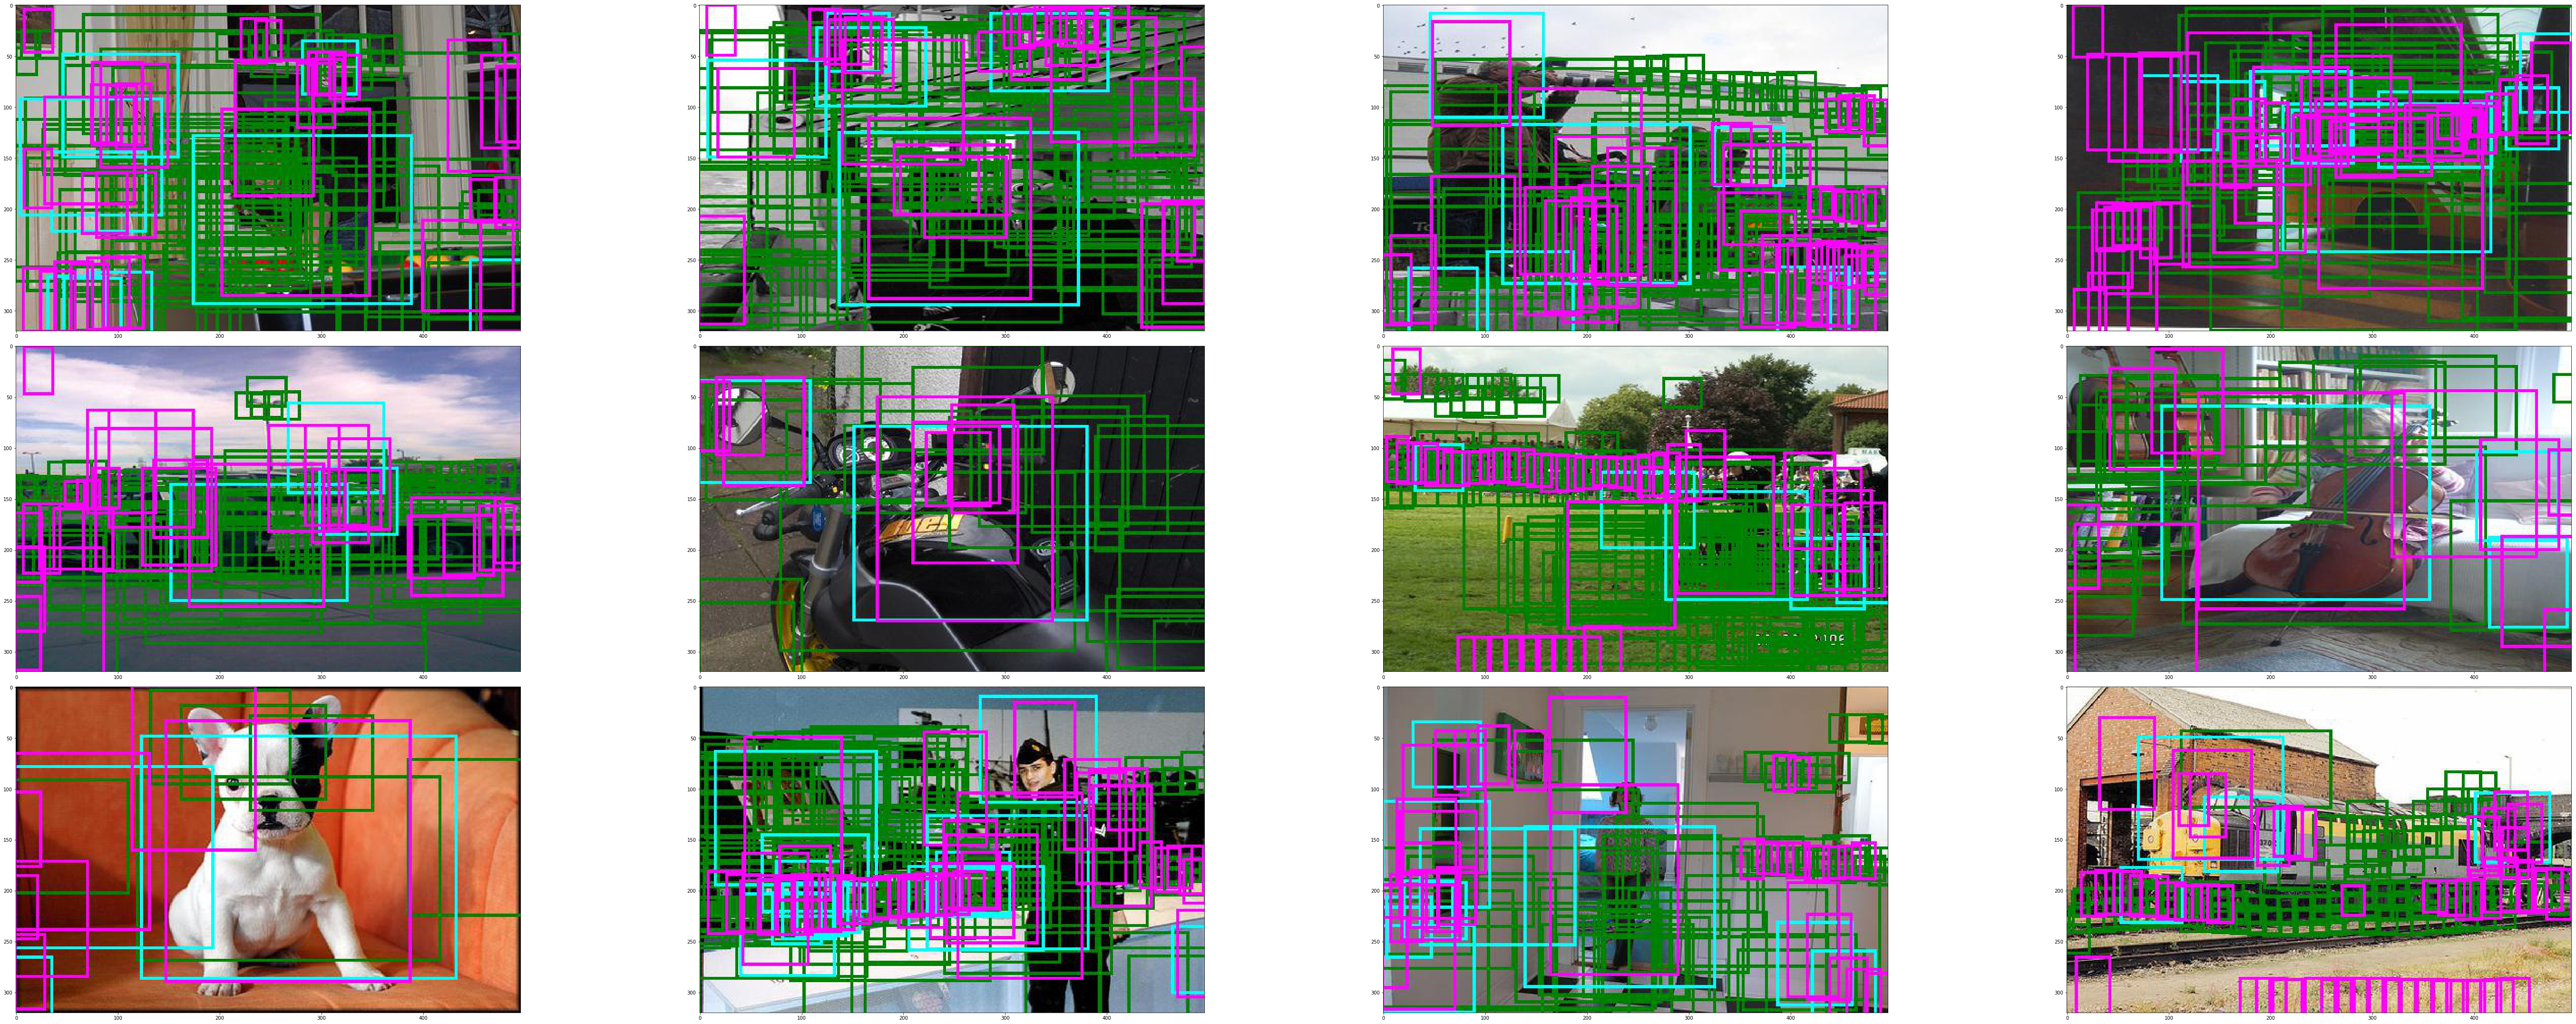

In [55]:
# Visualizing the first 12 images.
OUTPUT_PATH = 'tlt_infer_testing/images_annotated' # relative path from $USER_EXPERIMENT_DIR.
COLS = 4 # number of columns in the visualizer grid.
IMAGES = 12 # number of images to visualize.

visualize_images(OUTPUT_PATH, num_cols=COLS, num_images=IMAGES)

## 10. Deploy! <a class="anchor" id="head-10"></a>

In [56]:
!tlt-export $USER_EXPERIMENT_DIR/experiment_dir_retrain/weights/resnet18_detector_pruned.tlt \
            -o $USER_EXPERIMENT_DIR/experiment_dir_final/resnet18_detector.etlt \
            --outputs output_cov/Sigmoid,output_bbox/BiasAdd \
            --enc_key $API_KEY \
            --input_dims 3,320,496 \
            --max_workspace_size 1100000

Using TensorFlow backend.
2019-04-08 21:30:37,256 [INFO] magnet.encoding.magnet_export: Loading model from /workspace/tlt-experiments/experiment_dir_retrain/weights/resnet18_detector_pruned.tlt
2019-04-08 21:30:37.437754: W tensorflow/stream_executor/cuda/cuda_driver.cc:527] A non-primary context 0x5d9f9c0 for device 0 exists before initializing the StreamExecutor. The primary context is now 0x5d63a60. We haven't verified StreamExecutor works with that.
2019-04-08 21:30:37.438689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:898] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-08 21:30:37.439591: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:07.0
totalMemory: 15.90GiB freeMemory: 15.39GiB
2019-04-08 21:30:37.439623: I tensorflow/core/common_runtime/gpu

In [57]:
print('Exported model:')
print('------------')
!ls -lh $USER_EXPERIMENT_DIR/experiment_dir_final

Exported model:
------------
total 508K
-rw-r--r-- 1 root root 505K Apr  8 21:30 resnet18_detector.etlt
